# <font color='red'>**Business Problem**</font>

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

This project is to predict potential driver churn using multiple attributes based on the monthly information for a segment of drivers for 2019 and 2020 and provide actionable insights and recommendations.



In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv")

In [ ]:
df.shape

(19104, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0               0  01/01/19          1  28.0     0.0  C23                2   
1               1  02/01/19          1  28.0     0.0  C23                2   
2               2  03/01/19          1  28.0     0.0  C23                2   
3               3  11/01/20          2  31.0     0.0   C7                2   
4               4  12/01/20          2  31.0     0.0   C7                2   
...           ...       ...        ...   ...     ...  ...              ...   
19099       19099  08/01/20       2788  30.0     0.0  C27                2   
19100       19100  09/01/20       2788  30.0     0.0  C27                2   
19101       19101  10/01/20       2788  30.0     0.0  C27                2   
19102       19102  11/01/20       2788  30.0     0.0  C27                2   
19103       19103  12/01/20       2788  30.0     0.0  C27                2   

       Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0       57387      24/12/18             NaN                    1      1   
1       57387      24/12/18             NaN                    1      1   
2       57387      24/12/18        03/11/19                    1      1   
3       67016      11/06/20             NaN                    2      2   
4       67016      11/06/20             NaN                    2      2   
...       ...           ...             ...                  ...    ...   
19099   70254      06/08/20             NaN                    2      2   
19100   70254      06/08/20             NaN                    2      2   
19101   70254      06/08/20             NaN                    2      2   
19102   70254      06/08/20             NaN                    2      2   
19103   70254      06/08/20             NaN                    2      2   

       Total Business Value  Quarterly Rating  
0                   2381060                 2  
1                   -665480                 2  
2                         0                 2  
3                         0                 1  
4                         0                 1  
...                     ...               ...  
19099                740280                 3  
19100                448370                 3  
19101                     0                 2  
19102                200420                 2  
19103                411480                 2  

[19104 rows x 14 columns]>

In [ ]:
df.drop('Unnamed: 0',axis=1) #dropping Unnamed:0 as there is already a serial number

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [ ]:
df_eda=df.copy()  #making a copy for exploratory data analysis

In [ ]:
df_eda['MMM-YY'] = pd.to_datetime(df_eda['MMM-YY'],dayfirst=True)

/tmp/ipython-input-177689633.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_eda['MMM-YY'] = pd.to_datetime(df_eda['MMM-YY'],dayfirst=True)


In [ ]:
df_eda['Dateofjoining'] = pd.to_datetime(df_eda['Dateofjoining'],dayfirst=True)
df_eda['LastWorkingDate'] = pd.to_datetime(df_eda['LastWorkingDate'],dayfirst=True)

/tmp/ipython-input-1434326521.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_eda['Dateofjoining'] = pd.to_datetime(df_eda['Dateofjoining'],dayfirst=True)
/tmp/ipython-input-1434326521.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_eda['LastWorkingDate'] = pd.to_datetime(df_eda['LastWorkingDate'],dayfirst=True)


In [ ]:
df_eda_agg = df_eda.groupby('Driver_ID').agg({
    'MMM-YY': ['min', 'count'],   # earliest record + ride frequency proxy
    'City': lambda x: x.mode()[0],
    'Education_Level': lambda x: x.mode()[0],
    'Gender': lambda x: x.mode()[0],
    'Grade': lambda x: x.mode()[0],
    'Income': ['mean','min','max'],
    'Total Business Value': 'sum',
    'Quarterly Rating': ['mean','min','max'],
    'Age': lambda x: x.mode()[0],
    'Joining Designation': lambda x: x.mode()[0],
    'Dateofjoining': 'min',
    'LastWorkingDate': 'max'
}).reset_index()

In [ ]:
df_eda_agg.columns = ['Driver_ID','Reporting_Date','Ride_Frequency','City','Education_Level','Gender',
                      'Grade','Income','Min_Income','Max_Income','Total Business Value','Quarterly Rating','Min_Rating','Max_Rating','Age',
                      'Joining Designation','Dateofjoining','LastWorkingDate']

In [ ]:
df_eda_agg

,Driver_ID,Reporting_Date,Ride_Frequency,City,Education_Level,Gender,Grade,Income,Min_Income,Max_Income,Total Business Value,Quarterly Rating,Min_Rating,Max_Rating,Age,Joining Designation,Dateofjoining,LastWorkingDate
0,1,2019-01-01,3,C23,2,0.0,1,57387.0,57387,57387,1715580,2.000000,2,2,28.0,1,2018-12-24,2019-11-03
1,2,2020-01-11,2,C7,2,0.0,2,67016.0,67016,67016,0,1.000000,1,1,31.0,2,2020-06-11,NaT
2,4,2019-01-12,5,C13,2,0.0,2,65603.0,65603,65603,350000,1.000000,1,1,43.0,2,2019-07-12,2020-04-27
3,5,2019-01-01,3,C9,0,0.0,1,46368.0,46368,46368,120360,1.000000,1,1,29.0,1,2019-09-01,2019-07-03
4,6,2020-01-08,5,C11,1,1.0,3,78728.0,78728,78728,1265000,1.600000,1,2,31.0,3,2020-07-31,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2019-01-01,24,C24,0,0.0,3,82815.0,82815,82815,21748820,2.625000,1,4,33.0,2,2015-10-15,NaT
2377,2785,2020-01-08,3,C9,0,1.0,1,12105.0,12105,12105,0,1.000000,1,1,34.0,1,2020-08-28,2020-10-28
2378,2786,2019-01-01,9,C19,0,0.0,2,35370.0,35370,35370,2815090,1.666667,1,2,45.0,2,2018-07-31,2019-09-22
2379,2787,2019-01-01,6,C20,2,1.0,1,69498.0,69498,69498,977830,1.500000,1,2,28.0,1,2018-07-21,2019-06-20


In [ ]:
df_eda_agg['Target'] = df_eda_agg['LastWorkingDate'].notna().astype(int)

In [ ]:
df_eda_agg['Rating_increased'] = (df_eda_agg['Max_Rating']>df_eda_agg['Min_Rating']).astype(int)

In [ ]:
df_eda_agg['Income_increased'] = (df_eda_agg['Max_Income']>df_eda_agg['Min_Income']).astype(int)

In [ ]:
df_eda_agg['Age_bin']=pd.cut(df_eda_agg['Age'],bins=[18,30,50,100],labels=['Young','Middle','Senior'])

In [ ]:
df_eda_agg['Reporting_month']=df_eda_agg['Reporting_Date'].dt.month

In [ ]:
df_eda_agg['Reporting_year']=df_eda_agg['Reporting_Date'].dt.year

In [ ]:
df_eda_agg['Joining_month']=df_eda_agg['Dateofjoining'].dt.month

In [ ]:
df_eda_agg['Joining_year']=df_eda_agg['Dateofjoining'].dt.year

In [ ]:
df_eda_agg

,Driver_ID,Reporting_Date,Ride_Frequency,City,Education_Level,Gender,Grade,Income,Min_Income,Max_Income,...,Dateofjoining,LastWorkingDate,Target,Rating_increased,Income_increased,Age_bin,Reporting_month,Reporting_year,Joining_month,Joining_year
0,1,2019-01-01,3,C23,2,0.0,1,57387.0,57387,57387,...,2018-12-24,2019-11-03,1,0,0,Young,1,2019,12,2018
1,2,2020-01-11,2,C7,2,0.0,2,67016.0,67016,67016,...,2020-06-11,NaT,0,0,0,Middle,1,2020,6,2020
2,4,2019-01-12,5,C13,2,0.0,2,65603.0,65603,65603,...,2019-07-12,2020-04-27,1,0,0,Middle,1,2019,7,2019
3,5,2019-01-01,3,C9,0,0.0,1,46368.0,46368,46368,...,2019-09-01,2019-07-03,1,0,0,Young,1,2019,9,2019
4,6,2020-01-08,5,C11,1,1.0,3,78728.0,78728,78728,...,2020-07-31,NaT,0,1,0,Middle,1,2020,7,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2019-01-01,24,C24,0,0.0,3,82815.0,82815,82815,...,2015-10-15,NaT,0,1,0,Middle,1,2019,10,2015
2377,2785,2020-01-08,3,C9,0,1.0,1,12105.0,12105,12105,...,2020-08-28,2020-10-28,1,0,0,Middle,1,2020,8,2020
2378,2786,2019-01-01,9,C19,0,0.0,2,35370.0,35370,35370,...,2018-07-31,2019-09-22,1,1,0,Middle,1,2019,7,2018
2379,2787,2019-01-01,6,C20,2,1.0,1,69498.0,69498,69498,...,2018-07-21,2019-06-20,1,1,0,Young,1,2019,7,2018


# <font color='red'>**Exploratory Data Analysis**</font>

## **Univariate Analysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

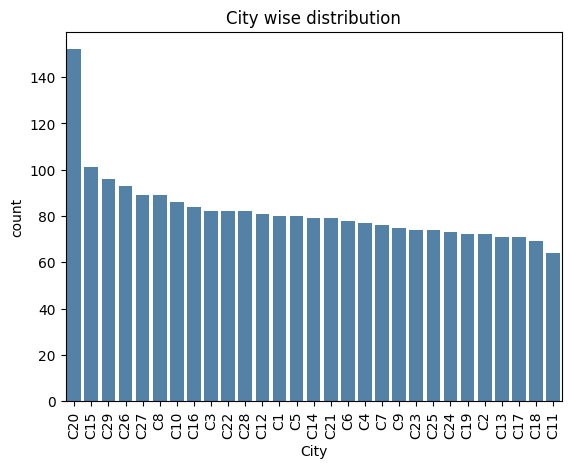

In [ ]:
sns.countplot(x='City',data=df_eda_agg,color='steelblue',order=df_eda_agg['City'].value_counts().index)
plt.xticks(rotation=90)
plt.title('City wise distribution')
plt.show()

**C20 is the city with maximum number of drivers**

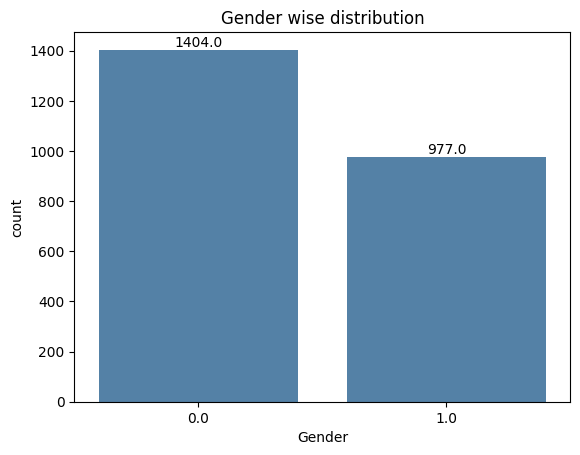

In [ ]:
sns.countplot(x='Gender',data=df_eda_agg,color="steelblue")
ax=plt.gca()
for p in ax.patches:
  ax.annotate(f'{p.get_height():.1f}',(p.get_x()+p.get_width()/2.,p.get_height()),ha="center",va="bottom",fontsize=10)
plt.title('Gender wise distribution')
plt.show()

**There are 1404 Male drivers as compared to 977 female drivers**

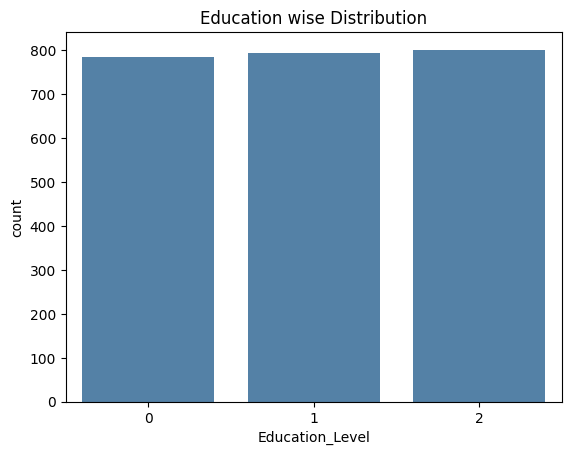

In [ ]:
sns.countplot(x='Education_Level',data=df_eda_agg,color="steelblue")
plt.title("Education wise Distribution")
plt.show()

**0 - 10+**
**1- 12+**
**2- Graduation**

**Education level is not making much difference to the count of drivers , although the number of graduates are highest but not much larger in number than 10th plus or 12th plus**

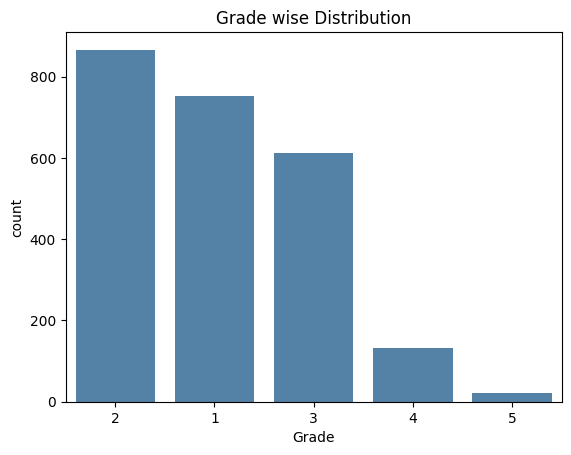

In [ ]:
sns.countplot(x='Grade',data=df_eda_agg,color="steelblue",order=df_eda_agg['Grade'].value_counts().index)
plt.title("Grade wise Distribution")
plt.show()

**Most of the drivers belong to Grade 2 and 1, that is average and high performance.**

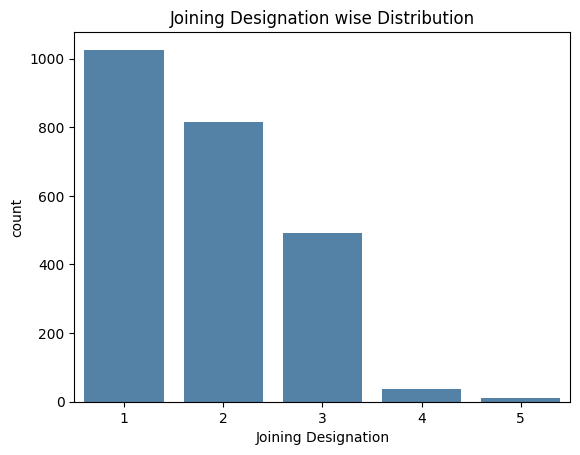

In [ ]:
sns.countplot(x='Joining Designation',data=df_eda_agg,color="steelblue",order=df_eda_agg['Joining Designation'].value_counts().index)
plt.title("Joining Designation wise Distribution")
plt.show()

**Most of the drivers have joining designation as 1 and the fewest number of drivers have 5 as designation**

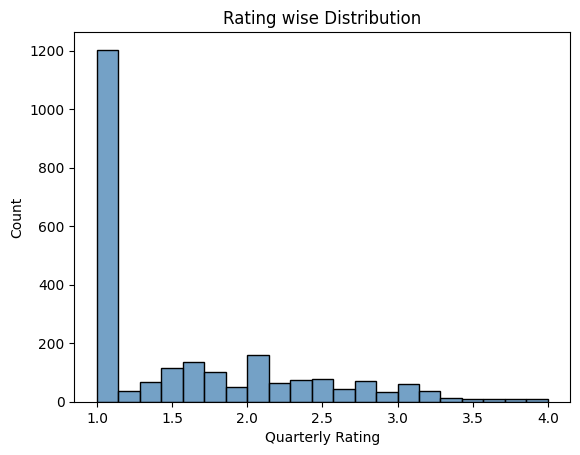

In [ ]:
sns.histplot(x='Quarterly Rating',data=df_eda_agg,color="steelblue")
plt.title('Rating wise Distribution')
plt.show()

**The high rating drivers are less in number, further in bivariate analysis we need to check whether most of these are the one who have resigned**

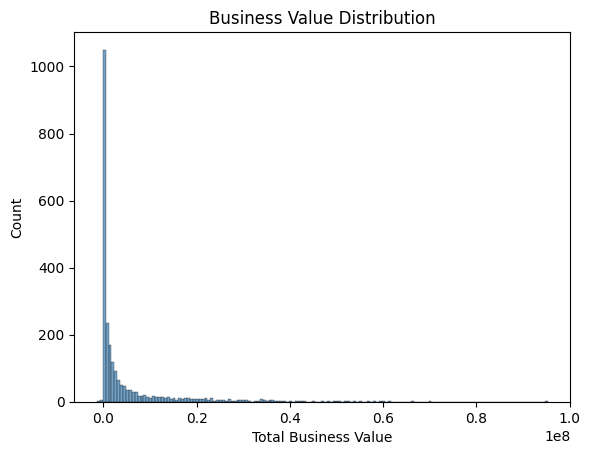

In [ ]:
sns.histplot(x='Total Business Value',data=df_eda_agg,color="steelblue")
plt.title("Business Value Distribution")
plt.show()

**Most of the drivers are not bringing much business, there are few drivers bringing business above 2 lakh, now we need to further compare quality rating with target feature to find out whether it is actually impacting the churn rate**

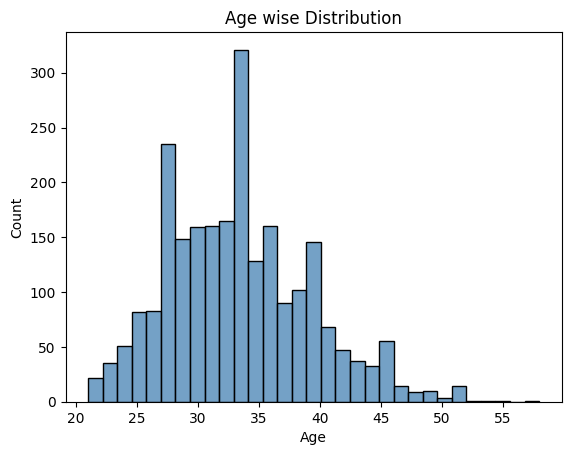

In [ ]:
sns.histplot(x="Age",data=df_eda_agg, color="steelblue")
plt.title("Age wise Distribution")
plt.show()

**The highest number of drivers belong to the age of 32**

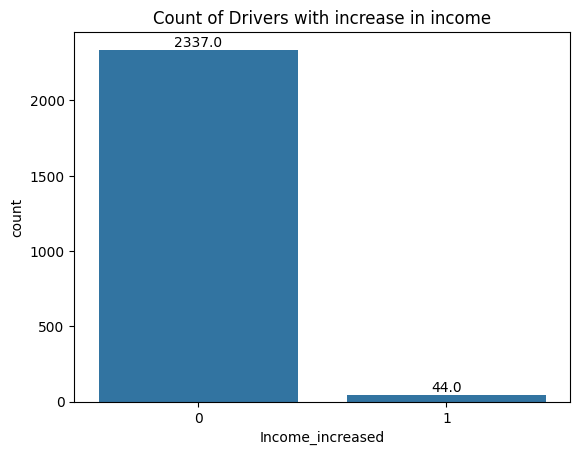

In [ ]:
sns.countplot(x=df_eda_agg['Income_increased'])
ax=plt.gca()
for p in ax.patches:
  ax.annotate(f'{p.get_height():.1f}',(p.get_x()+p.get_width()/2.,p.get_height()),ha="center",va="bottom",fontsize=10)
plt.title('Count of Drivers with increase in income')
plt.show()

In [ ]:
print(f'{round((44/(44+2337))*100,2)} % of drivers have got increase in income')

1.85 % of drivers have got increase in income


Only 2% of drivers have got increments in their income.

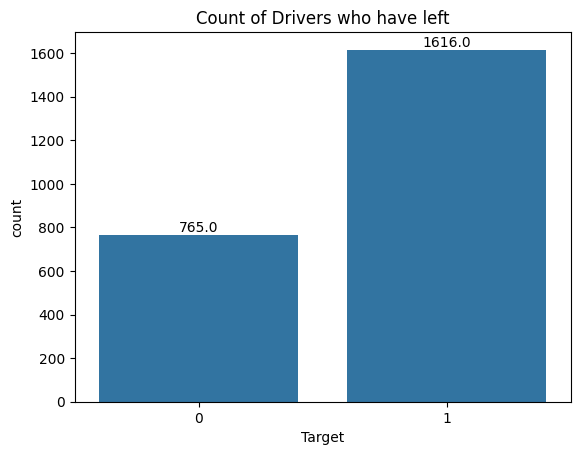

In [ ]:
sns.countplot(x=df_eda_agg['Target'])
ax=plt.gca()
for p in ax.patches:
  ax.annotate(f'{p.get_height():.1f}',(p.get_x()+p.get_width()/2.,p.get_height()),ha="center",va="bottom",fontsize=10)
plt.title('Count of Drivers who have left')
plt.show()

In [ ]:
print(f'Churn Rate is {round((1616/(1616+765))*100,2)}%')

Churn Rate is 67.87%


1616 drivers have left Ola in 2019 and 2020 . Churn Rate is 67.87%

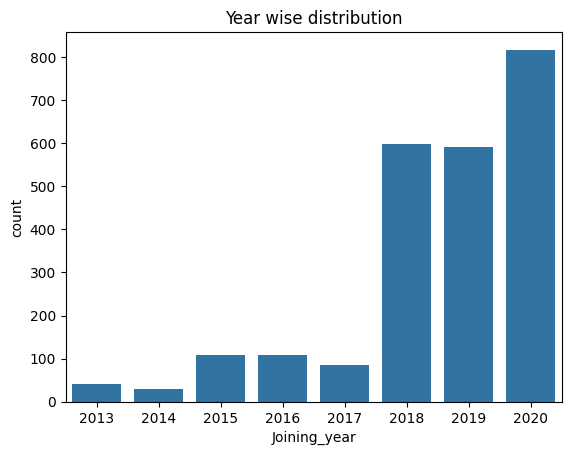

In [ ]:
sns.countplot(x=df_eda_agg['Joining_year'])
plt.title('Year wise distribution')
plt.show()

**Maximum number of drivers have joined the organization in 2020 and minimum in 2014.**

We saw a decline in the number from year 2013 to 2014 , it could be due to unorganized taxi market and the other challenges faced by startup in initial stage.

There has been increase in 2015 , which can be attributed to expansion and acquisition strategies of the company.

The number has declined from 2016 to 2017 which signify either driver dissatisfaction or the entry of new players in ride hailing and mobility sector.

There has been a significant increase from 2017 to 2018 and then from 2019 to 2020.

In [ ]:
df_eda_agg['Rating_increased'].value_counts()

,count
Rating_increased,
0,1277
1,1104


## **Bi-variate and Multi-variate Analysis**

### **Income vs Driver Churn**

/tmp/ipython-input-3881645355.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target',y='Income',data=df_eda_agg,palette="coolwarm")


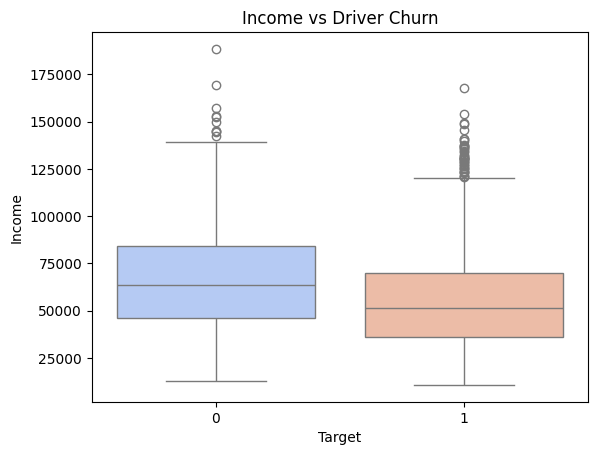

In [ ]:
sns.boxplot(x='Target',y='Income',data=df_eda_agg,palette="coolwarm")
plt.title("Income vs Driver Churn")
plt.show()

In [ ]:
df_eda_agg[['Target','Income']].corr()

,Target,Income
Target,1.000000,-0.197988
Income,-0.197988,1.000000


**Higher-income individuals are slightly less likely to churn, but the effect is weak**

### **Year wise Churn Rate**

#### **Churn Rate by Reporting Year**

In [ ]:
data=pd.crosstab(df_eda_agg['Reporting_year'],df_eda_agg['Target'])
data['churn_rate']=data[1]/(data[1]+data[0])


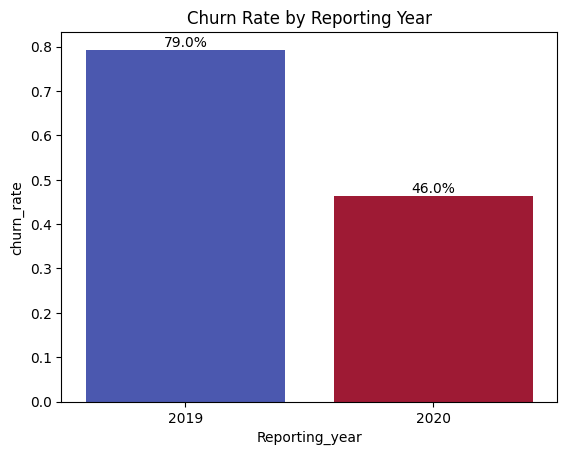

In [ ]:
sns.barplot(x=data.index,hue=data.index,y='churn_rate',data=data,palette="coolwarm",legend=False)
ax=plt.gca()
for p in ax.patches:
  ax.annotate(f'{round(p.get_height(),2)*100}%',(p.get_x()+p.get_width()/2.,p.get_height()),ha="center",va="bottom",fontsize=10)
plt.title('Churn Rate by Reporting Year')
plt.show()


**Churn Rate has decreased from 79% to 46% in the reporting year 2020**

#### **Churn Rate by Joining Year**

In [ ]:

data=pd.crosstab(df_eda_agg['Joining_year'],df_eda_agg['Target'])
data['churn_rate']=data[1]/(data[1]+data[0])

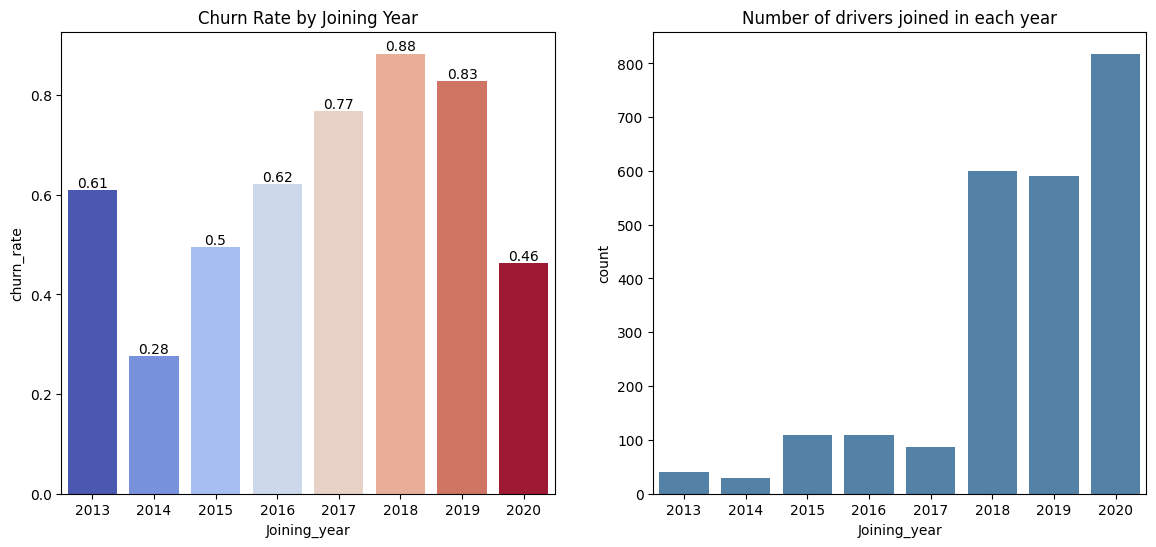

In [ ]:
plt.figure(figsize=(14,6))

# 1st subplot: churn rate by joining year
plt.subplot(1,2,1)
sns.barplot(x=data.index, y='churn_rate', hue=data.index, data=data, palette="coolwarm",legend=False)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{round(p.get_height(),2)}',
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha="center", va="bottom", fontsize=10)
plt.title('Churn Rate by Joining Year')

# 2nd subplot: count of drivers by joining year
plt.subplot(1,2,2)
sns.countplot(x=df_eda_agg['Joining_year'], color="steelblue")
plt.title('Number of drivers joined in each year')


plt.show()


**2013-2015**- Driver count and churn rate goes hand-in-hand, with increasing or decreasing driver count churn rate also increased and decreased.

**2016-2018** - 2016 to 2017 saw less drivers joining and more leaving probably due to market saturation and competition from new players in the market (Uber,Rapido)

**2018-2019**- Churn rate didn't see a major variation from 2018 to 2019 possibly due to retention and expansion strategies of Ola.

**2019-2020**-In 2020 the churn rate has seen a sharp decline( from 83% to 46%) and driver count is maximum. COVID-19 temporarily reducing churn (drivers had fewer alternatives).Newer drivers still being “fresh” in the system and not yet dropping off.


### **Churn Rate by Joining Month**

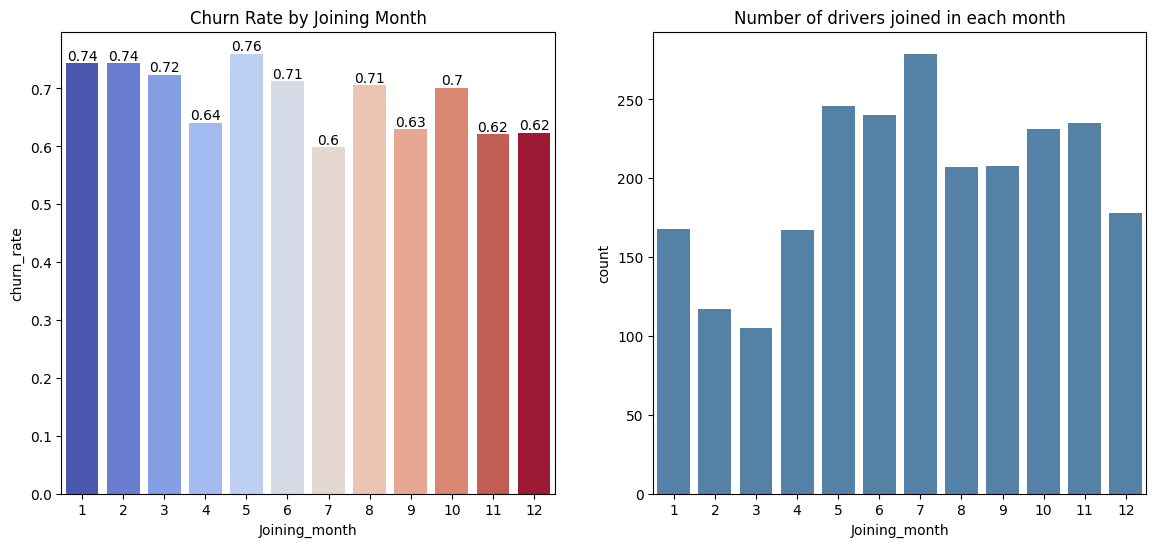

In [ ]:
data=pd.crosstab(df_eda_agg['Joining_month'],df_eda_agg['Target'])
data['churn_rate']=data[1]/(data[1]+data[0])

plt.figure(figsize=(14,6))

# 1st subplot: churn rate by joining month
plt.subplot(1,2,1)
sns.barplot(x=data.index, y='churn_rate', hue=data.index, data=data, palette="coolwarm",legend=False)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{round(p.get_height(),2)}',
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha="center", va="bottom", fontsize=10)
plt.title('Churn Rate by Joining Month')

# 2nd subplot: count of drivers by joining month
plt.subplot(1,2,2)
sns.countplot(x=df_eda_agg['Joining_month'], color="steelblue")
plt.title('Number of drivers joined in each month')


plt.show()


**Insights**-

1. April Month is the starting of new Financial Year, the curn rate is low and the count of drivers joining in the same month is also low.

2. July is the month where highest number of drivers are joining and the churn rate is low probably because Ola is hiring the most at this time and also it is the end of Q1 for the new Financial Year.

3. Festive Season in October - higher churn rate despite new drivers joining. In November churn rate decreases a little but in December, January, Februrary churn rate is increasing possibly due to winter season, fog, traffic, delay in time between ride booking and driver arrival, december-new year vacations and people travelling to other cities.

### **Age vs Driver Churn**

<Axes: xlabel='Age_bin', ylabel='count'>

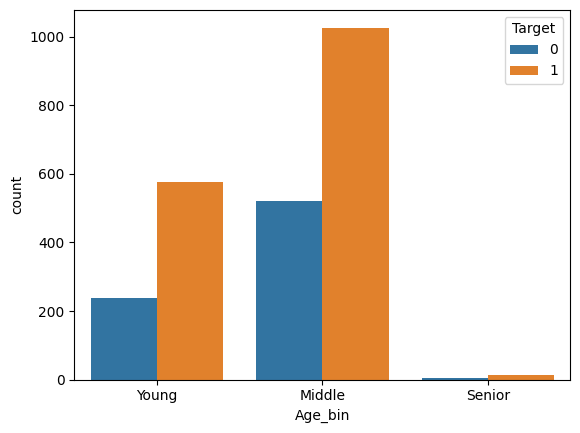

In [ ]:
sns.countplot(x='Age_bin',hue='Target',data=df_eda_agg)


In [ ]:
data_age=pd.crosstab(df_eda_agg['Age_bin'],df_eda_agg['Target'])
data_age['Churn_Rate']=data_age[1]/(data_age[1]+data_age[0])

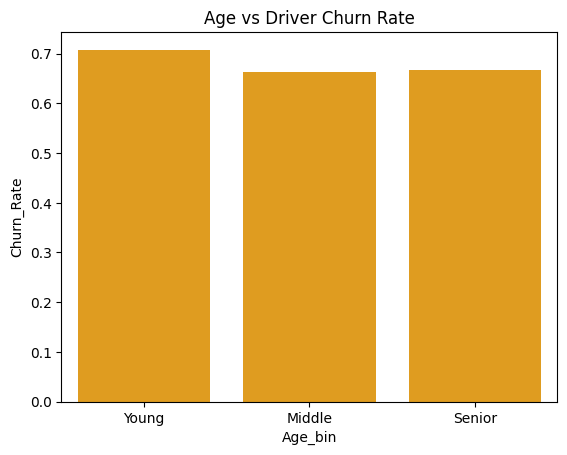

In [ ]:
sns.barplot(x=data_age.index,y='Churn_Rate',data=data_age,color="orange")
plt.title('Age vs Driver Churn Rate')
plt.show()

**There is no clear monotonic relationship between Age and Driver Churn but we can say that the young and middle age group (between 27 and 36) has a higher churn rate with 31 being the highest**

### **Age vs Quarterly Rating**

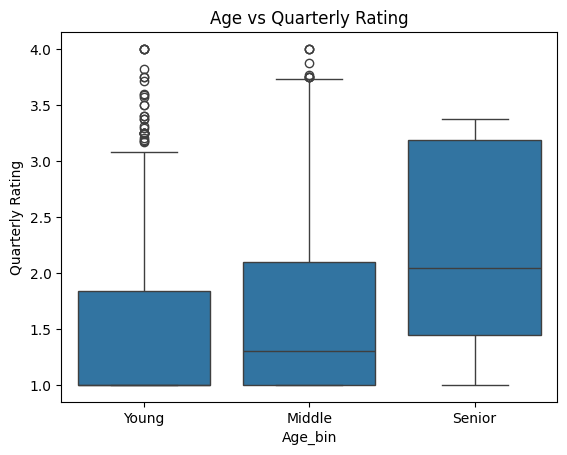

In [ ]:
sns.boxplot(x='Age_bin',y='Quarterly Rating',data=df_eda_agg)
plt.title("Age vs Quarterly Rating")
plt.show()

**As the Age increases the median and the spread of average quarterly rating increases, however, there are outliers at young and middle age groups. There are few young and middle aged drivers who are getting high ratings between 3.0 and 4.0**

### **Grade vs Driver Churn**

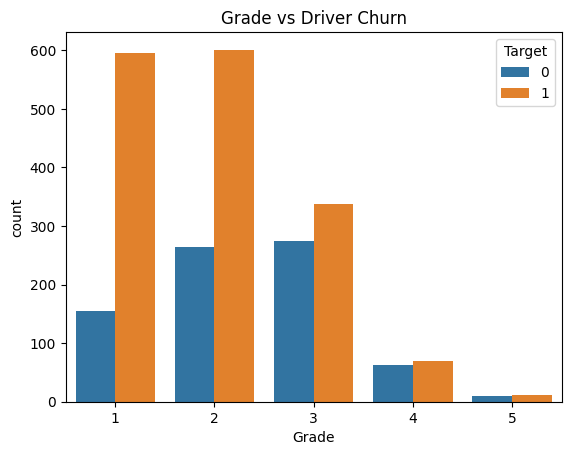

In [ ]:
sns.countplot(x='Grade',hue='Target',data=df_eda_agg)
plt.title('Grade vs Driver Churn')
plt.show()

**Drivers with low grades are less likely to leave the organization. Drivers with mid grades may or may not leave the organization hence grade alone is not a strong predictor**

### **Gender vs Driver Churn**

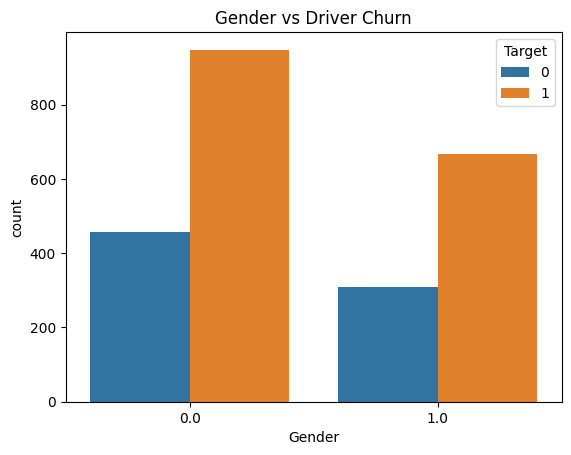

In [ ]:
sns.countplot(x='Gender',hue='Target',data=df_eda_agg)
plt.title('Gender vs Driver Churn')
plt.show()

In [ ]:
data_gender=pd.crosstab(df_eda_agg['Gender'],df_eda_agg['Target'])
data_gender['churn_rate']=(data_gender[1]/(data_gender[0]+data_gender[1]))*100

In [ ]:
data_gender

Target,0,1,churn_rate
Gender,,,
0.0,456,948,67.521368
1.0,309,668,68.372569


### **Joining Designation vs Driver Churn**

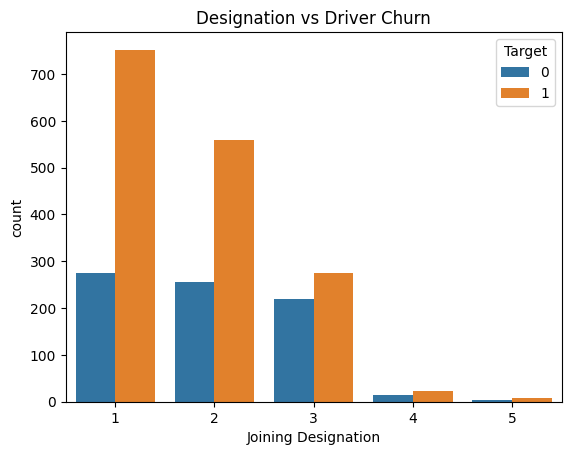

In [ ]:
sns.countplot(x='Joining Designation',hue='Target',data=df_eda_agg)
plt.title('Designation vs Driver Churn')
plt.show()

In [ ]:
data_designation=pd.crosstab(df_eda_agg['Joining Designation'],df_eda_agg['Target'])
data_designation['churn_rate']=(data_designation[1]/(data_designation[0]+data_designation[1]))*100

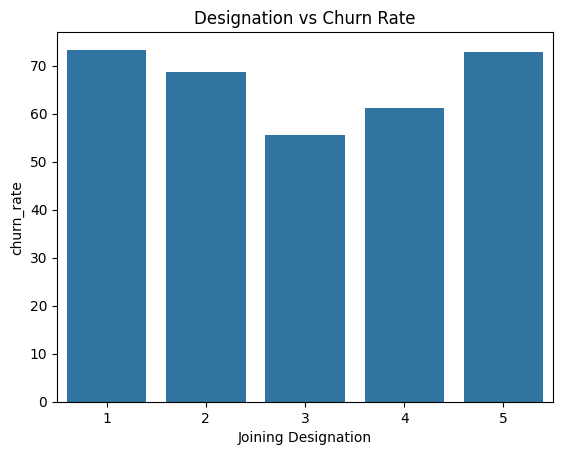

In [ ]:
sns.barplot(x=data_designation.index,y='churn_rate',data=data_designation)
plt.title('Designation vs Churn Rate')
plt.show()

In [ ]:
data_designation

Target,0,1,churn_rate
Joining Designation,,,
1,274,752,73.294347
2,255,560,68.711656
3,219,274,55.578093
4,14,22,61.111111
5,3,8,72.727273


Drivers with **high level designations and low level designations(1,5)** at the time of joining have the highest churn rate.

**Mid level designations(2,3 and 4)** have low churn rates comparatively out of which 2 has the highest and 3 the lowest.

**The number of drivers with designation as 1 are the highest in number but they are leaving also at the highest rate. 5 are the lowest in number still churn rate is high**

Moving ahead, we need to check relationship of designation with quarterly rating,income, grade etc. to find out why people with higher and lower designations are leaving more.

#### **Joining Designation vs Income**

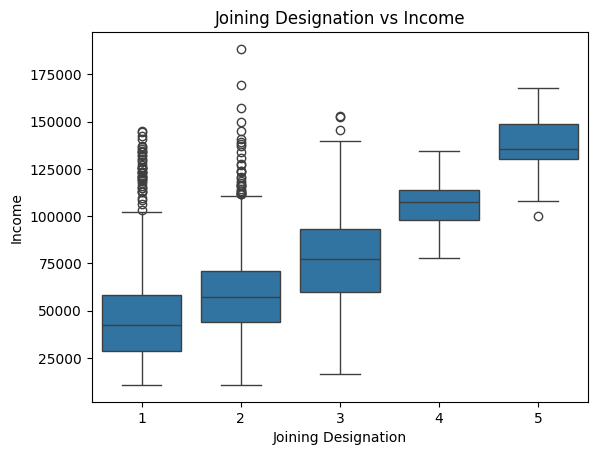

In [ ]:
sns.boxplot(x='Joining Designation',y='Income',data=df_eda_agg)
plt.title('Joining Designation vs Income')
plt.show()

Income is directly proportional to designation, Higher designation people getting more income.

There are few exceptions as well as we are seeing outliers in designation 1 and 2 means there are drivers with low designation as well, taking exceptionally higher salaries and very few people (might be 1-2% as seen by outliers at 5th designation) at highest designation are having low salary comparatively

Ola is not able to retain drivers with higher designation despite paying good salaries which signifies higher or competitive salaries alone is not the way to retain drivers while there are low designation drivers earning good income might be due to performance incentives, clear roles and responsibilities etc.

#### **Joining Designation vs Age**

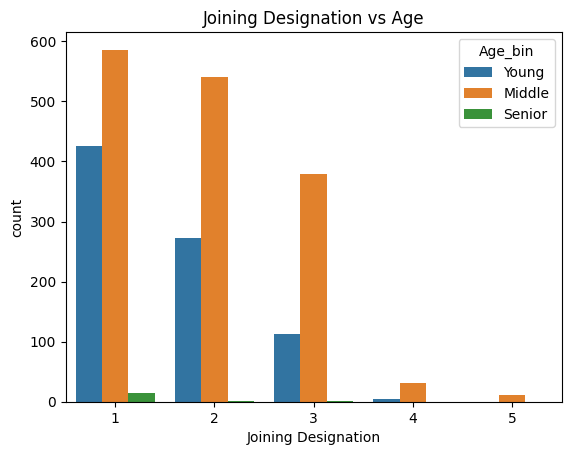

In [ ]:
sns.countplot(x='Joining Designation',hue='Age_bin',data=df_eda_agg)
plt.title('Joining Designation vs Age')
plt.show()

Majority of the drivers are in middle age bracket (30-50).

Drivers with age above 50 are quite less in number and they are joining at lower designations like 1,2,3. At higher designations (4,5) people often belong to middle age group.

Majority drivers with age less than 30 are joining at lower designations like
1,2 with few joining at designation 3.


#### **Joining Designation vs Business Value**

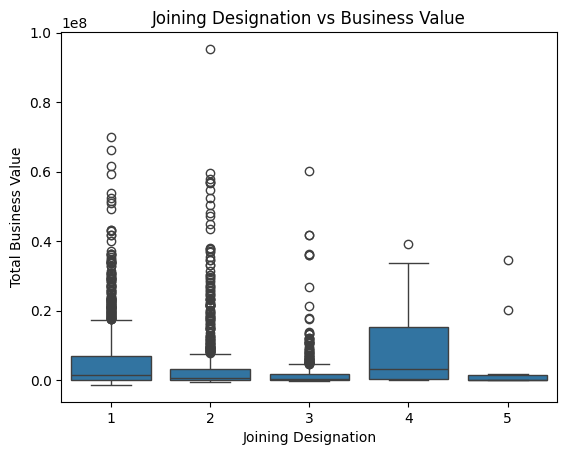

In [ ]:
sns.boxplot(x='Joining Designation',y='Total Business Value',data=df_eda_agg)
plt.title('Joining Designation vs Business Value')
plt.show()

Median business value appears lowest for designations 1–3, higher for designation 4, and lowest again for designation 5, though all groups contain many extreme high-value outliers.

Maximum business is being brought by drivers with designation 4.

Outiers from designation 1-3 (1st and 2nd have more dense outliers) signify that there is a small subset of these people contributing dispropotionately higher business value.

Designation 5 drivers have the lowest spread and median, they are bringing the lease business.

#### **Joining Designation vs City**

In [ ]:
data = df_eda_agg.groupby('Joining Designation')['City'].agg(lambda x: x.mode()[0]).reset_index()

In [ ]:
data

,Joining Designation,City
0,1,C20
1,2,C20
2,3,C20
3,4,C20
4,5,C12


#### **Joining Designation vs Grade**

<Axes: xlabel='Joining Designation', ylabel='count'>

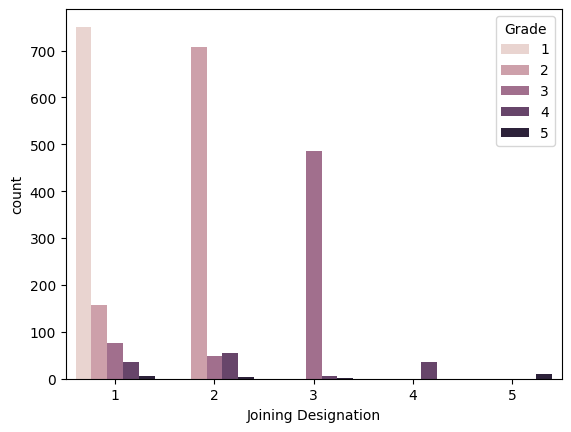

In [ ]:
sns.countplot(x='Joining Designation',hue='Grade',data=df_eda_agg)

**Mostly grades are the same as designation level, hence we can say designation level at the time of joining is one of the strong metrics to assign grades to the drivers**

#### **Joining Designation vs Quarterly Rating**

<Axes: xlabel='Joining Designation', ylabel='Quarterly Rating'>

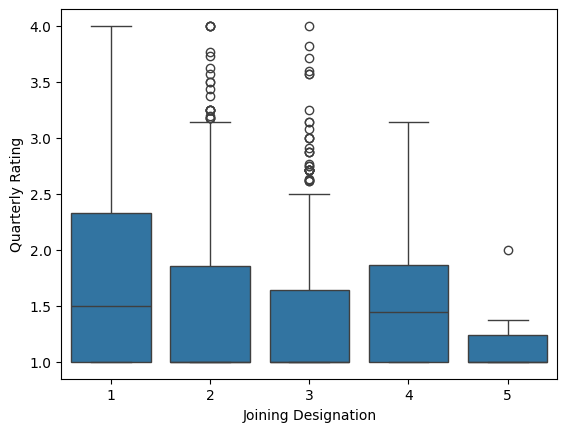

In [ ]:
sns.boxplot(x='Joining Designation',y='Quarterly Rating',data=df_eda_agg)

**Drivers with joining designation as 5 are getting lowest ratings, the drivers with joining designation as 1 getting ratings upto mid level but the mid level designations like 2,3 are getting the highest rating 4.0(as seen by outliers)**

### **Business Value vs Driver Churn**

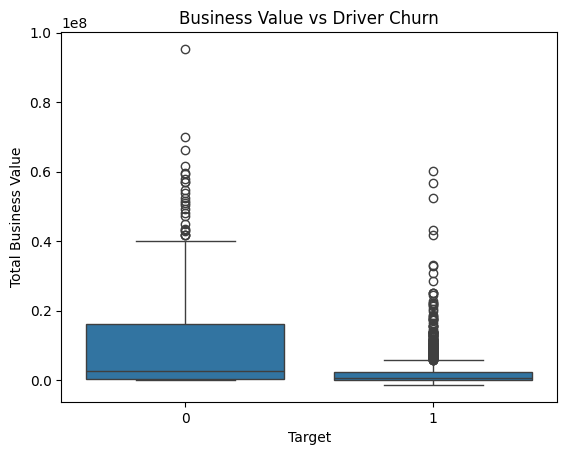

In [ ]:
sns.boxplot(y='Total Business Value',x='Target',data=df_eda_agg)
plt.title('Business Value vs Driver Churn')
plt.show()

In [ ]:
df_eda_agg[['Total Business Value',
            'Target']].corr()

,Total Business Value,Target
Total Business Value,1.000000,-0.379552
Target,-0.379552,1.000000


**Drivers bringing less business has a higher churn rate but the negative correlation value is not that higher , it means business value alone is not a strong predictor**

### **Education_Level vs Driver Churn**

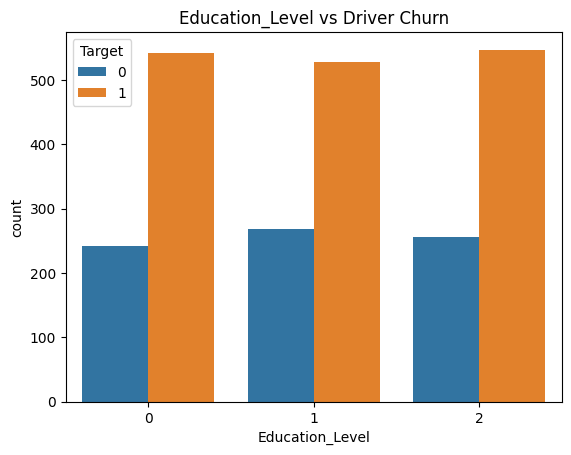

In [ ]:
sns.countplot(hue='Target',x='Education_Level',data=df_eda_agg)
plt.title("Education_Level vs Driver Churn")
plt.show()

**Churn Rate is highest amongst 10th Pass students , and then graduated and the least amongst 12th pass, but the difference is not significant(~3%) hence, Education level alone is having little impact**

### **Education Level vs Quarterly Rating**

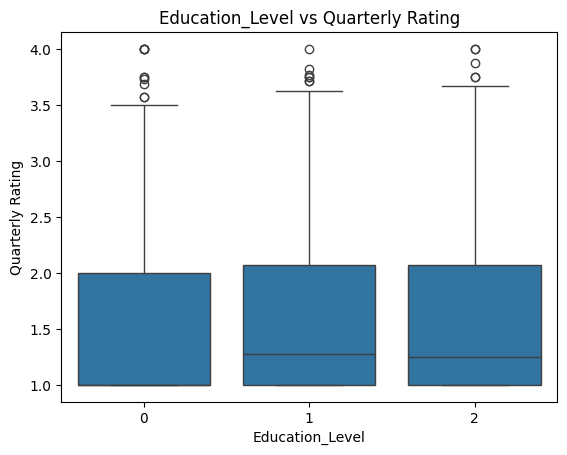

In [ ]:
sns.boxplot(x='Education_Level',y='Quarterly Rating',data=df_eda_agg)
plt.title('Education_Level vs Quarterly Rating')
plt.show()

**Insights-**

12th Pass Drivers have higher median rating as compared to those of 10th Pass while Graduated Drivers have a little less median rating as those of 12th Pass.

The IQR spread of the drivers with higher education is more than that of 10th Pass.

The spread of the ratings is between 1.0 and 2.1 for all the education levels however the outliers exist at all the levels.

Education level has a small impact over quarterly ratings.

### **City vs Driver Churn**

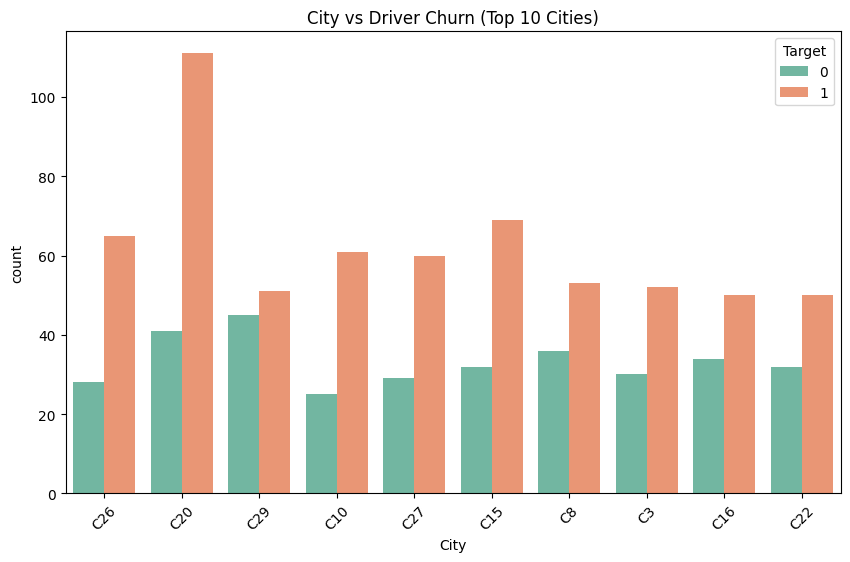

In [ ]:
top_cities = df_eda_agg['City'].value_counts().index[:10]

plt.figure(figsize=(10,6))
sns.countplot(x='City', hue='Target',
              data=df_eda_agg[df_eda_agg['City'].isin(top_cities)],
              palette='Set2')
plt.title("City vs Driver Churn (Top 10 Cities)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
data_city=pd.crosstab(df_eda_agg['City'],df_eda_agg['Target'])
data_city['churn_rate']=(data_city[1]/(data_city[1]+data_city[0]))*100

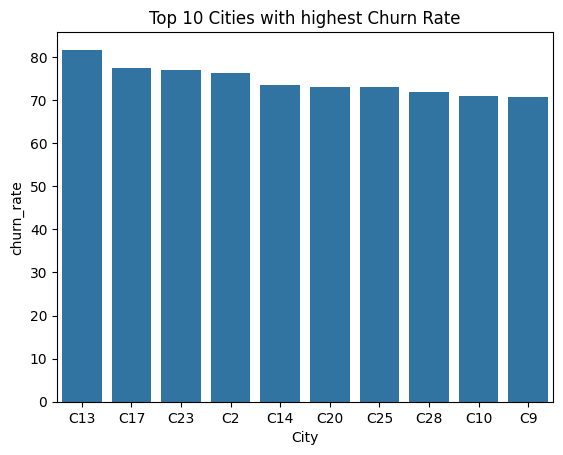

In [ ]:
data_top_10=data_city.sort_values('churn_rate',ascending=False).head(10)
sns.barplot(x=data_top_10.index,y='churn_rate',data=data_top_10)
plt.title('Top 10 Cities with highest Churn Rate')
plt.show()


**C13 is the city with highest churn rate of drivers(~81%). City(where driver operates in) is an important predictor for churn rate.**

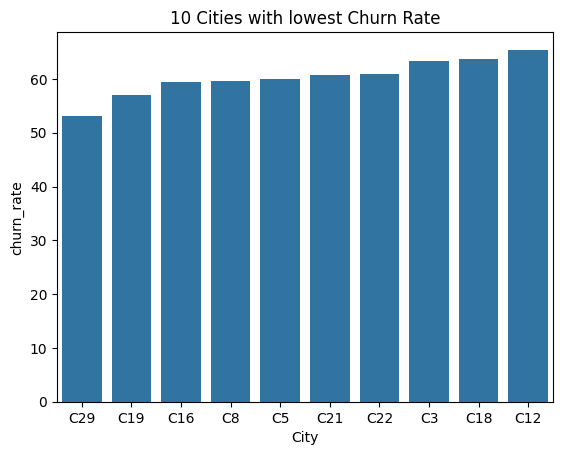

In [ ]:
data_bottom_10=data_city.sort_values('churn_rate',ascending=True).head(10)
sns.barplot(x=data_bottom_10.index,y='churn_rate',data=data_bottom_10)
plt.title('10 Cities with lowest Churn Rate')
plt.show()

**C29 has the lowest (53%) churn rate**

### **Quarterly Rating vs Rides Frequency**

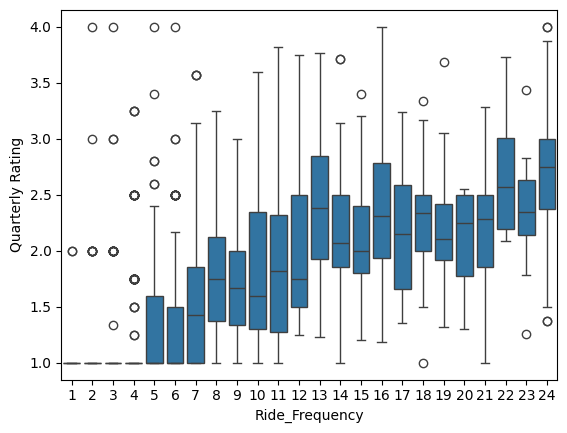

In [ ]:
sns.boxplot(x=df_eda_agg['Ride_Frequency'],y=df_eda_agg['Quarterly Rating'])
plt.show()

<Axes: xlabel='Ride_Frequency', ylabel='Max_Rating'>

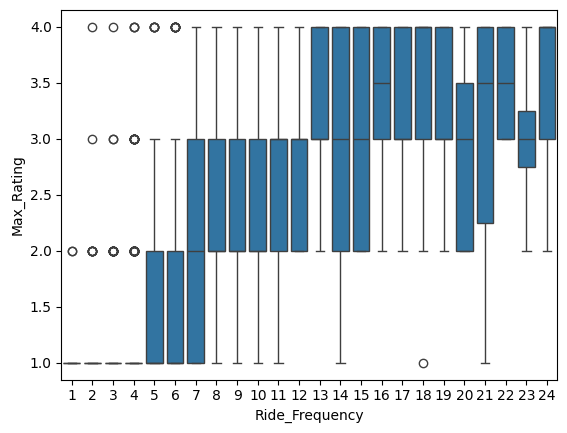

In [ ]:
sns.boxplot(x=df_eda_agg['Ride_Frequency'],y=df_eda_agg['Max_Rating'])

In [ ]:
df_eda_agg[['Ride_Frequency','Quarterly Rating']].corr()

,Ride_Frequency,Quarterly Rating
Ride_Frequency,1.000000,0.727732
Quarterly Rating,0.727732,1.000000


**Median of rating is increasing with the Ride Frequency but there are few exceptions also as there are drivers taking only 2-6 rides but still have higher ratings**

**Ride Frequency and Rating have a positive co-orelation of 0.73**

### **Quarterly Rating vs Driver Churn**

<Axes: xlabel='Target', ylabel='Quarterly Rating'>

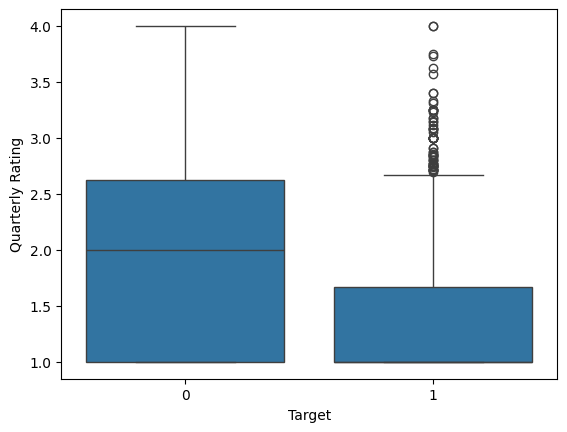

In [ ]:
sns.boxplot(x='Target',y='Quarterly Rating',data=df_eda_agg)

### **Increase in Income vs Driver Churn**

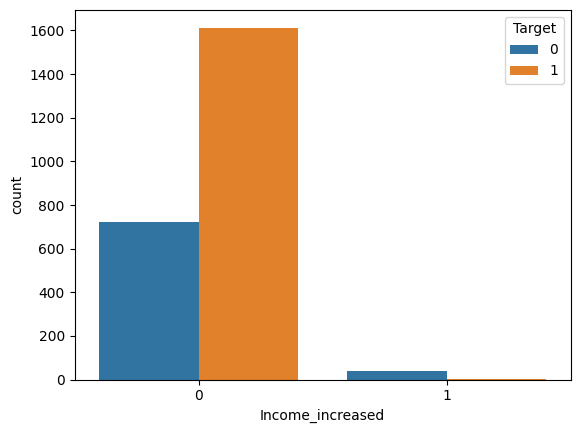

In [ ]:
sns.countplot(x='Income_increased',hue='Target',data=df_eda_agg)
plt.show()

In [ ]:
data=pd.crosstab(df_eda_agg['Income_increased'],df_eda_agg['Target'])
data['churn_rate']=data[1]/(data[1]+data[0])
data

Target,0,1,churn_rate
Income_increased,,,
0,724,1613,0.690201
1,41,3,0.068182


**Drivers whose income have increased has just 6% churn rate, while others whose income have been stagnant have churn rate of 69% hence increase in income is a major factor affecting churn rate but the story could be otherwise as well like lower churn=longer stay=increase in income**

We can further analyze this by checking how tenure is impacting increase in income

### **Quarterly Rating vs City**

<Axes: xlabel='City', ylabel='Quarterly Rating'>

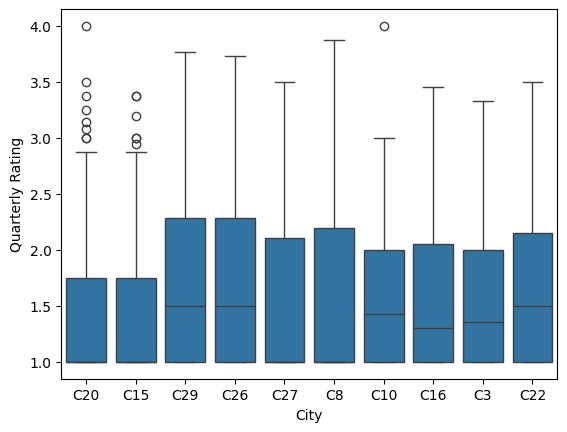

In [ ]:
sns.boxplot(x='City',y='Quarterly Rating',data=df_eda_agg,order=df_eda_agg['City'].value_counts().index[:10])

In [ ]:
data=df_eda_agg.groupby('City')['Quarterly Rating'].mean().sort_values(ascending=False)

In [ ]:
data.index[0]

'C29'

Insights-

**Out of all the drivers whose rating have increased maximum are from C20**
**but the City with maximum improvement in rating is C29**

### **Quarterly Rating vs Joining Month**

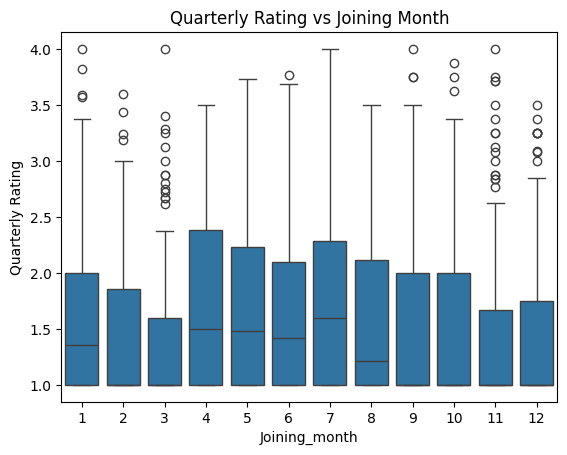

In [ ]:
sns.boxplot(x='Joining_month',y='Quarterly Rating',data=df_eda_agg)
plt.title('Quarterly Rating vs Joining Month')
plt.show()

**Insights-**

1. Festive / Holiday Seasons from November to December (e.g., Diwali, Christmas, New Year in India):

Surge in rides → drivers get overworked → ratings may dip due to delays or stress.

2. Year-End/Quarter-End Pressure in February and March:

Companies push for targets → drivers push more rides → quality may drop.

3. New Financial Year / Fresh Quarter from April to July:

Drivers motivated, platforms give incentives → ratings improve.

### **Tenure vs Increase in Income vs Churn Rate**

In [ ]:
#creating feature tenure to check whether increase in income is really causing low churn or it is just because stay longer naturally
#means higher income and no real impact of increase in income on churn rate

In [ ]:
df_eda_agg['tenure']=((df_eda_agg['LastWorkingDate'].fillna(pd.to_datetime('2020-12-31'))-df_eda_agg['Dateofjoining']).dt.days)/30

In [ ]:
df_eda_agg['tenure_bin']=pd.cut(df_eda_agg['tenure'],bins=[0,6,12,24,36,60],labels=['0-6m','6-12m','1-2y','2-3y','3-5y'])

In [ ]:
df_eda_agg.groupby('tenure_bin')[['Income_increased','Target']].corr()

/tmp/ipython-input-3069155809.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eda_agg.groupby('tenure_bin')[['Income_increased','Target']].corr()


Income_increased    Target
tenure_bin                                             
0-6m       Income_increased               NaN       NaN
           Target                         NaN  1.000000
6-12m      Income_increased          1.000000 -0.067899
           Target                   -0.067899  1.000000
1-2y       Income_increased          1.000000 -0.170764
           Target                   -0.170764  1.000000
2-3y       Income_increased          1.000000 -0.363144
           Target                   -0.363144  1.000000
3-5y       Income_increased          1.000000 -0.334985
           Target                   -0.334985  1.000000

**Drivers with tenure greater than 2 years and growth in income have lower churn rate, churn rate is decreasing as the tenure increasing from 6 months to 1 year to 2 year to 3 years but then increases a little (~0.02)**

**Tenure definitely has an impact on income increase and then churn rate**

### **Ride Frequency vs Business Value**

<Axes: xlabel='Ride_Frequency', ylabel='Total Business Value'>

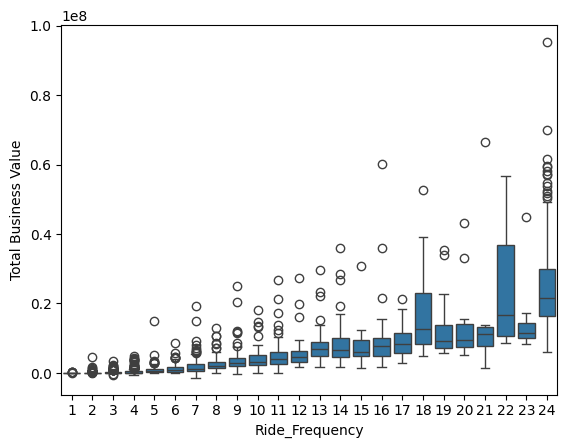

In [ ]:
sns.boxplot(x=df_eda_agg['Ride_Frequency'],y=df_eda_agg['Total Business Value'])

In [ ]:
df_eda_agg[['Ride_Frequency','Total Business Value']].corr()

,Ride_Frequency,Total Business Value
Ride_Frequency,1.000000,0.791473
Total Business Value,0.791473,1.000000


**More number of rides means more business value, they have a positive co-orelation of 0.79**

### **Business Value vs Increase in Income**

<Axes: xlabel='Income_increased', ylabel='Total Business Value'>

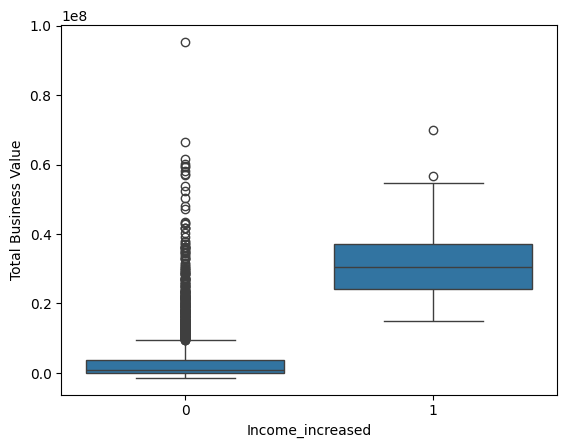

In [ ]:
sns.boxplot(x=df_eda_agg['Income_increased'],y=df_eda_agg['Total Business Value'])

In [ ]:
(df_eda_agg[['Income_increased','Total Business Value']]).corr()

,Income_increased,Total Business Value
Income_increased,1.000000,0.427368
Total Business Value,0.427368,1.000000


**Drivers who generate more business value usually earn more income, but the link is only moderate because other factors (like grade, incentives, tenure) also play a role**

### **Joining Designation vs Tenure**

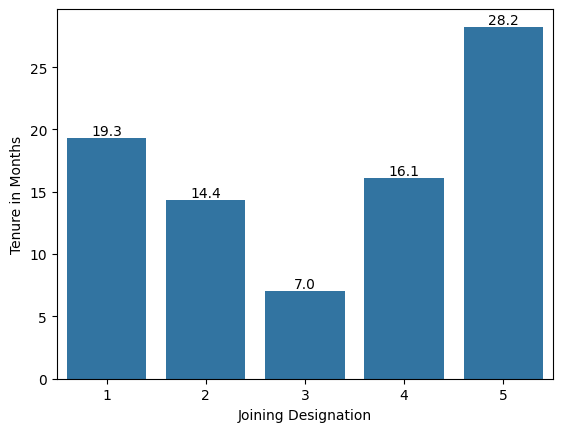

In [ ]:
sns.barplot(x='Joining Designation',y='tenure',data=df_eda_agg,errorbar=None)
ax=plt.gca()
for p in ax.patches:
  ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.ylabel('Tenure in Months')
plt.show()


### **Joining Designation vs Increase in Income**

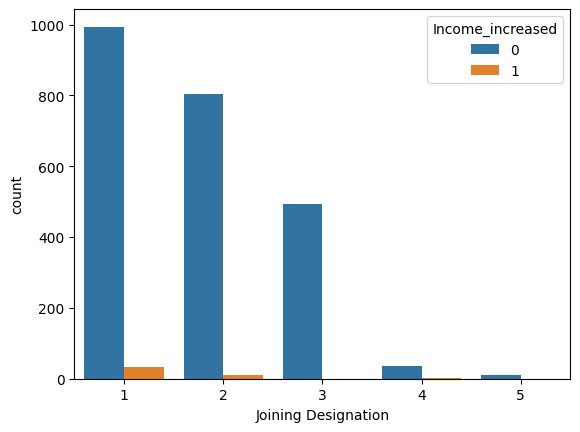

In [ ]:
sns.countplot(x='Joining Designation',hue='Income_increased',data=df_eda_agg)
plt.show()

In [ ]:
data=pd.crosstab(df_eda_agg['Joining Designation'],df_eda_agg['Income_increased'])
data['%_of_drivers_with_inc_in_income']=(data[1]/(data[1]+data[0]))*100

In [ ]:
data

Income_increased,0,1,%_of_drivers_with_inc_in_income
Joining Designation,,,
1,994,32,3.118908
2,804,11,1.349693
3,493,0,0.000000
4,35,1,2.777778
5,11,0,0.000000


### **Joining Designation vs Joining Year vs Churn Rate**

In [ ]:
data=pd.crosstab(df_eda_agg['Joining Designation'],df_eda_agg['Joining_year'])

In [ ]:
data

Joining_year,2013,2014,2015,2016,2017,2018,2019,2020
Joining Designation,,,,,,,,
1,9,9,66,95,67,400,217,163
2,27,20,41,10,12,165,211,329
3,3,0,2,0,2,26,140,320
4,2,0,0,0,3,3,22,6
5,0,0,0,3,2,5,1,0


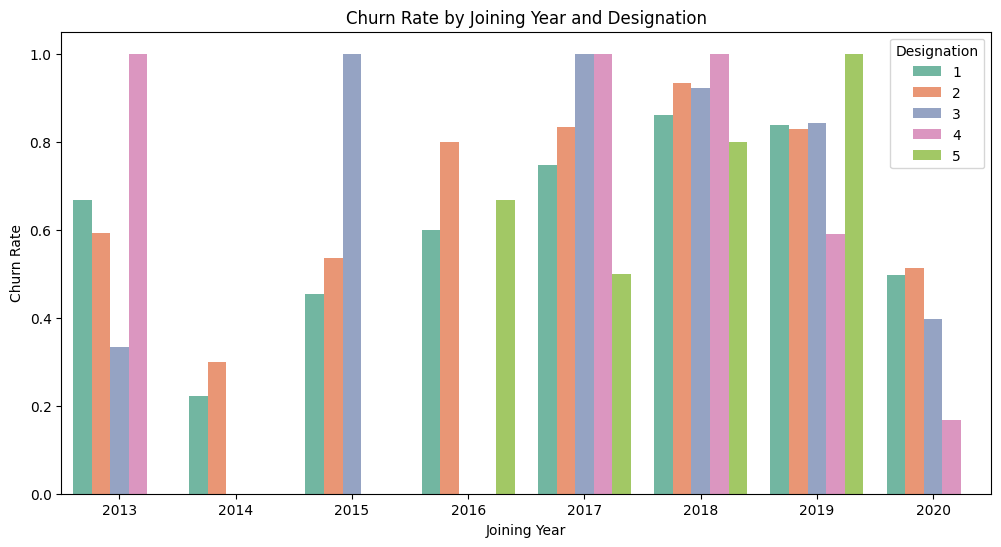

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Joining_year", y="Target", hue="Joining Designation",
            data=df_eda_agg, errorbar=None , palette="Set2")

plt.title("Churn Rate by Joining Year and Designation")
plt.ylabel("Churn Rate")
plt.xlabel("Joining Year")
plt.legend(title="Designation")
plt.show()

**Insights-**

**Designation 1 (Entry-level)**

**Churn Rate**: ~73% (very high).

**Income Increase**: ~3.1% of drivers.

**Tenure**: ~19 months.

**Interpretation**:

Even though a few get income increases, entry-level employees still churn heavily.

Why? They’re often switching companies for higher salary hikes or moving up internally to Designation 2 or driving part time along with job/studies just for financial needs.

Income increase alone doesn’t anchor them — career growth matters more.

**Designation 2 (Mid-level)**

**Churn Rate**: ~69%.

**Income Increase**: Only 1.3%.

**Tenure**: ~14 months (shorter than designation 1).

**Interpretation**:

Very few income increases here, which hurts retention.

**Designation 3 (Critical bottleneck)**

**Churn Rate**: ~56% (better than 1 & 2).

**Income Increase**: 0%.

**Tenure**: Only 7 months (the shortest).

**Interpretation**:

Nobody gets income growth here.

Employees don’t survive long (low tenure) but churn rate looks lower only because many have joined in 2020 or might be promoting to 4th designation.

As the headcount is low at 4th designation, this is a high-risk attrition point.

**Designation 4 (Small sample)**

**Churn Rate**: ~61%.

**Income Increase**: 2.8%.

**Tenure**: ~16 months.

**Interpretation**:

Slightly better than 2, but still the churn rate is higher, small headcount, so less impactful in overall story.

At this designation, either drivers are leaving or being promoted to 5th(very few)

Income increase isn’t a driver here → other retention levers (prestige, recognition, stability, other facilities like insurance etc.) matter more.

**Designation 5 (Senior-most)**

**Churn Rate**: ~73%.

**Income Increase**: 0%.

**Tenure**: ~28 months (highest).

**Interpretation**:

They stay longer but eventually exit in large proportion.

May be due to better offers elsewhere, limited growth, or burnout.

Ola hasn't hired anyone on this designation in 2020.

Both monetary and non-monetary incentives are needed at this level.Income increase isn’t a driver here → other retention levers (prestige, recognition, stability) matter more.

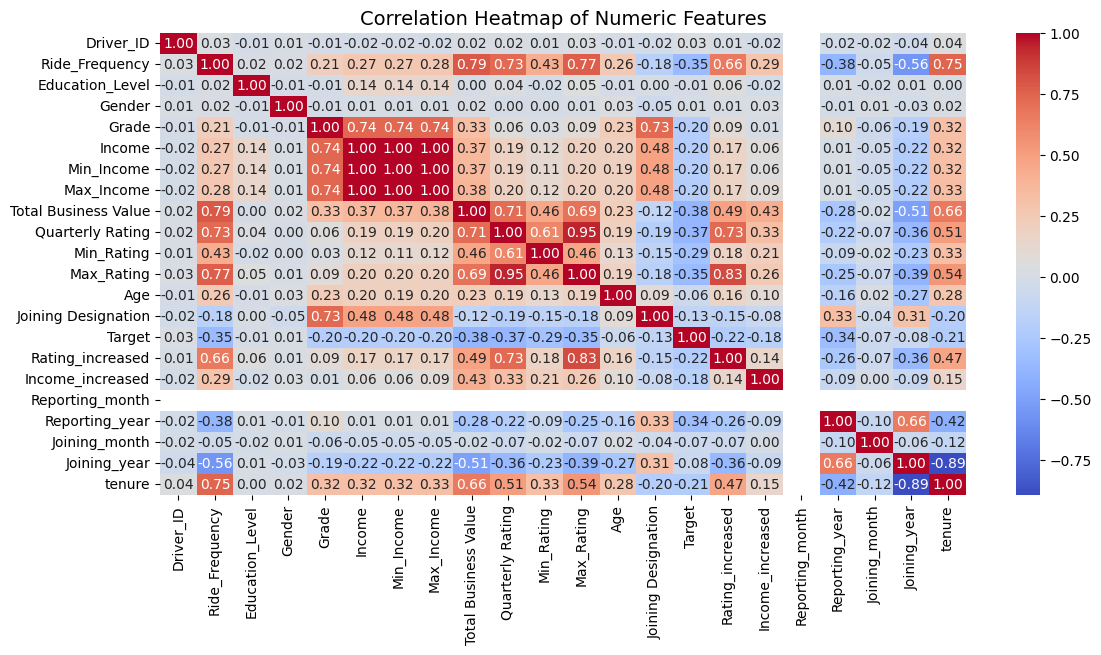

In [ ]:
# Select only numeric columns
df_numeric = df_eda_agg.select_dtypes(include='number')

# Compute correlations
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(13,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

# <font color='red'>**Model Building**</font>

### **Data Preprocessing for model building**

In [ ]:
df_model=df_eda_agg.copy() #copy for model building

#### **Checking for duplicates**

In [ ]:
df_model.duplicated().sum()

np.int64(0)

#### **Checking for NULL Values**

In [ ]:
df_model.isna().sum()

,0
Driver_ID,0
Reporting_Date,0
Ride_Frequency,0
City,0
Education_Level,0
Gender,0
Grade,0
Income,0
Min_Income,0
Max_Income,0


#### **Feature Engineering**

In [ ]:
#droppping some of the features that were created for eda or they are redundant and this way null values also handled

In [ ]:
df_model.drop('LastWorkingDate',axis=1,inplace=True)

In [ ]:
df_model.drop('tenure',axis=1,inplace=True)

In [ ]:
df_model.drop('tenure_bin',axis=1,inplace=True)

In [ ]:
df_model.drop('Dateofjoining',axis=1,inplace=True) # already extracted month and year

In [ ]:
df_model.drop('Reporting_Date',axis=1,inplace=True) #already extracted month and year

In [ ]:
df_model.drop('Min_Rating',axis=1,inplace=True)

In [ ]:
df_model.drop('Max_Rating',axis=1,inplace=True)

In [ ]:
df_model.drop('Min_Income',axis=1,inplace=True)

In [ ]:
df_model.drop('Max_Income',axis=1,inplace=True)

In [ ]:
df_model.drop('Age',axis=1,inplace=True)   #keeping Age_bin hence dropping Age as keeping both will cause redundancy

In [ ]:
df_model.drop('Reporting_month',axis=1,inplace=True) #reporting month not adding any relevant information

In [ ]:
df_model.drop('Driver_ID',axis=1,inplace=True)

In [ ]:
df_model.drop('Joining_month',axis=1,inplace=True)

#### **Outlier Handling**

##### **Outlier Detection**

In [ ]:
df_model.select_dtypes(include='number').skew()

,0
Ride_Frequency,1.297038
Education_Level,-0.013891
Gender,0.364813
Grade,0.518221
Income,0.777603
Total Business Value,3.361335
Quarterly Rating,1.095329
Joining Designation,0.687900
Target,-0.765864
Rating_increased,0.145794


In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers, lower, upper

In [ ]:
outliers_income, lower_income, upper_income = detect_outliers_iqr(df_model, "Income")
print(f"Income outliers: {len(outliers_income)}")
print(f"Bounds: {lower_income} to {upper_income}")

Income outliers: 47
Bounds: -15992.5 to 130931.5


In [ ]:
outliers_rating, lower_rating, upper_rating = detect_outliers_iqr(df_model, "Quarterly Rating")
print(f"Rating outliers: {len(outliers_rating)}")
print(f"Bounds: {lower_rating} to {upper_rating}")

Rating outliers: 28
Bounds: -0.5 to 3.5


In [ ]:
def detect_outliers_percentile(df, col, lower=0.01, upper=0.99):
    lower_val = df[col].quantile(lower)
    upper_val = df[col].quantile(upper)
    outliers = df[(df[col] < lower_val) | (df[col] > upper_val)]
    return outliers, lower_val, upper_val


In [ ]:
outliers_bv,lower_bv,upper_bv=detect_outliers_percentile(df_model,"Total Business Value")

In [ ]:
print(f"Business Value Outliers : {len(outliers_bv)}")
print(f"Bounds: {lower_bv} to {upper_bv}")

Business Value Outliers : 34
Bounds: 0.0 to 43135091.99999997


##### **Outlier Treatment**

In [ ]:
def iqr_capping(df,cols,factor=1.5):
  """
  Caps outliers using IQR method.
  Args:
      df (pd.DataFrame): DataFrame to process
      cols (list): List of numerical columns
      factor (float): multiplier for IQR (default=1.5)
  Returns:
      pd.DataFrame with capped values
  """
  for col in cols:
        iqr1=df[col].quantile(0.25)
        iqr3=df[col].quantile(0.75)
        iqr=iqr3-iqr1
        lower=iqr1-factor*iqr
        upper=iqr3+factor*iqr
        df[col]=np.where(df[col]<lower,lower,np.where(df[col]>upper,upper,df[col]))
  return df



In [ ]:
def log_percentile_capping(df, cols, lower_pct=0.05, upper_pct=0.95):
    """
    Applies log1p transform + percentile capping.
    Args:
        df (pd.DataFrame): DataFrame to process
        cols (list): List of skewed numerical columns
        lower_pct (float): lower percentile threshold (default=1%)
        upper_pct (float): upper percentile threshold (default=99%)
    Returns:
        pd.DataFrame with transformed + capped values
    """
    for col in cols:
        # Apply log1p transform (handles zeros safely)
        df[col] = np.log1p(df[col])

        # Percentile thresholds
        lower = df[col].quantile(lower_pct)
        upper = df[col].quantile(upper_pct)

        # Apply capping
        df[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
    return df

In [ ]:
#using yeo-johnson as the business value has negative values

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df_model['Total Business Value'] = pt.fit_transform(df_model[['Total Business Value']])

In [ ]:
df_model= iqr_capping(df_model,['Income'])

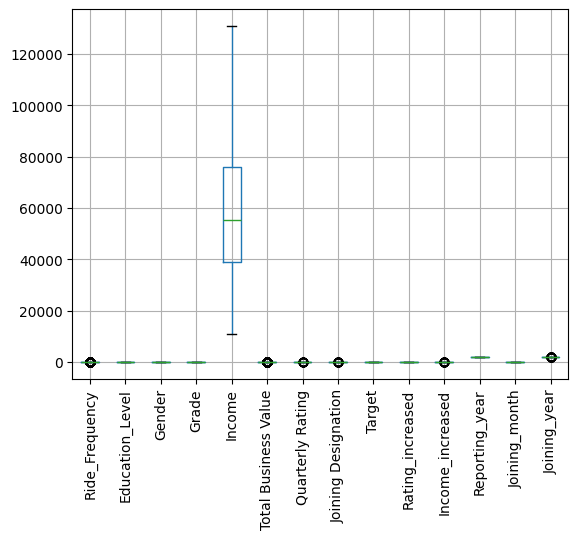

In [ ]:
df_model.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Leaving other features except Income and Business Value as it as they are either bounded or categorical values with useful information
#(like Rating,Age,Ride_Frequency etc.)

In [ ]:
df_numeric=df_model.select_dtypes(include='number')
df_numeric.skew()

,0
Ride_Frequency,1.297038
Education_Level,-0.013891
Gender,0.364813
Grade,0.518221
Income,0.648573
Total Business Value,-1.303334
Quarterly Rating,1.095329
Joining Designation,0.687900
Target,-0.765864
Rating_increased,0.145794


#### **Encoding**

In [ ]:
Age_bin_dummies=pd.get_dummies(df_model['Age_bin'],prefix='Age_bin',drop_first=True)
df_model=pd.concat([df_model,Age_bin_dummies],axis=1)
df_model=df_model.drop('Age_bin',axis=1)

#### **Train-Test-Split**

In [ ]:
X=df_model.drop('Target',axis=1)
y=df_model['Target']

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

X_train.shape

(1428, 15)

#### **Target Encoding**

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import TargetEncoder

In [ ]:
encode= TargetEncoder(cols='City')

In [ ]:
encode.fit(X_train,y_train)

TargetEncoder(cols=['City'])

In [ ]:
X_train=encode.transform(X_train)
X_val=encode.transform(X_val)
X_test=encode.transform(X_test)


### **Applying Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### **Randomized Search CV**

In [ ]:
X_train.shape

(1428, 15)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf= RandomForestClassifier(random_state=42,n_jobs=-1)

# Parameter distributions
param_dist = { 'n_estimators' : [100,200,300,400,500],
              'max_depth' : [3,5,10],
               'criterion' : ['gini', 'entropy'],
               'bootstrap' : [True],
               'max_features' : [4,8,15],
               'min_samples_split' : [2, 5, 10],
               'min_samples_leaf' : [1,3,7] }
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                # only 20 random combos (fast!)
    cv=3,                     # 3-fold CV
    scoring='roc_auc',        # or 'accuracy'
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit on training data
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 15, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}
Best Score: 0.9466067059234761


In [ ]:
random_search

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10],
                                        'max_features': [4, 8, 15],
                                        'min_samples_leaf': [1, 3, 7],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='roc_auc', verbose=2)

#### **Using above parameters derived from Randomized Search CV to train the model**

In [ ]:
rf=RandomForestClassifier(criterion='entropy', max_depth=7, max_features=8,
                       min_samples_leaf=7, n_estimators=200, n_jobs=-1,
                       random_state=42,bootstrap=True,class_weight='balanced') #changing depth and max_features to avoid overfitting

In [ ]:
from sklearn.model_selection import KFold, cross_validate

kfold=KFold(n_splits=10)
cv_accuracy=cross_validate(rf,X_train,y_train,cv=kfold,scoring="accuracy",return_train_score=True)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=8, min_samples_leaf=7,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
print(f"K-Fold Accuracy Mean: \n Train: {cv_accuracy['train_score'].mean()*100:.3f} \n Validation: {cv_accuracy['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_accuracy['train_score'].std()*100:.3f}, \n Validation: {cv_accuracy['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 89.255 
 Validation: 87.885
K-Fold Accuracy Std: 
 Train: 0.410, 
 Validation: 2.301


In [ ]:
rf.score(X_train,y_train)

0.8921568627450981

In [ ]:
rf.score(X_val,y_val)

0.8466386554621849

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
np.mean(rf.predict(X_val)==y_val)

np.float64(0.8466386554621849)

In [ ]:
np.mean(y_pred==y_test)

np.float64(0.870020964360587)

In [ ]:
importances=rf.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]

In [ ]:
indices

array([ 0, 12, 11,  6,  7,  1,  5,  8,  2,  9,  4, 13,  3, 10, 14])

In [ ]:
names=[X_train.columns[i] for i in indices]

In [ ]:
names

['Ride_Frequency',
 'Joining_year',
 'Reporting_year',
 'Total Business Value',
 'Quarterly Rating',
 'City',
 'Income',
 'Joining Designation',
 'Education_Level',
 'Rating_increased',
 'Grade',
 'Age_bin_Middle',
 'Gender',
 'Income_increased',
 'Age_bin_Senior']

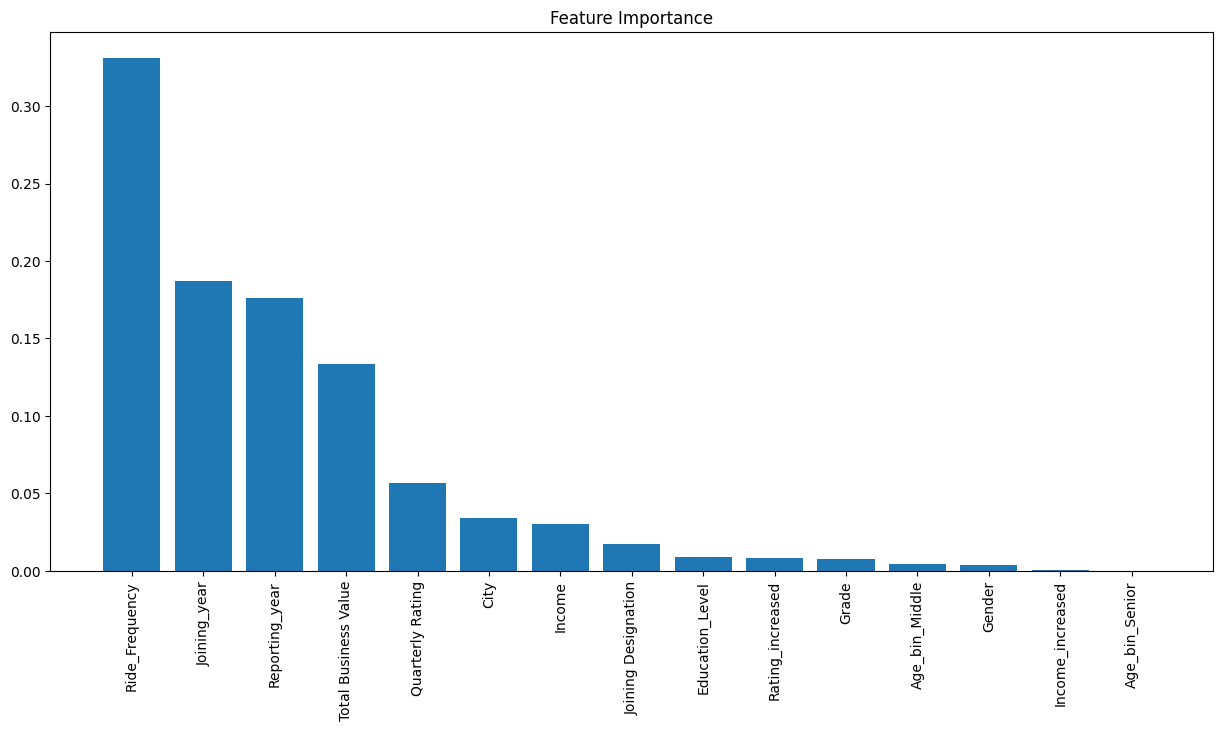

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]),importances[indices])
plt.xticks(range(X_train.shape[1]),names,rotation=90)
plt.show()

### **Evaluation Metrics**

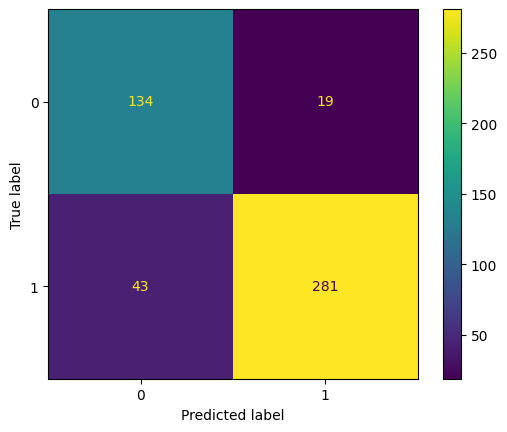

In [ ]:
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score,roc_auc_score,f1_score,classification_report
conf = confusion_matrix(y_test, rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=rf.classes_)
disp.plot()

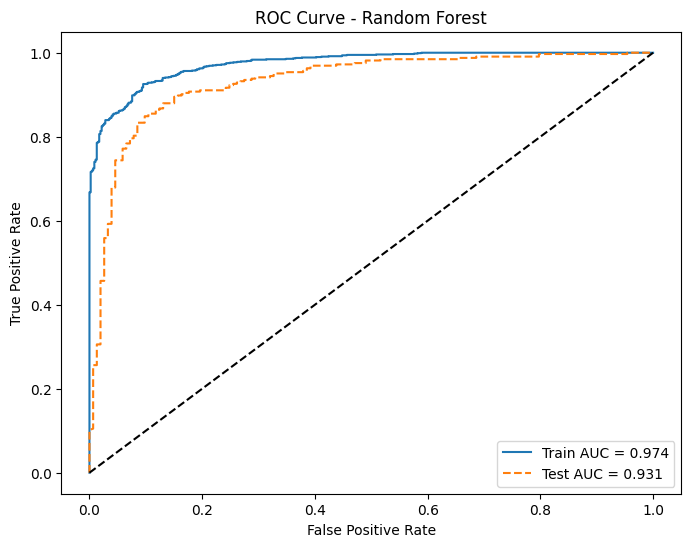

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities
y_train_prob = rf.predict_proba(X_train)[:,1]
y_test_prob  = rf.predict_proba(X_test)[:,1]

# ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test,  tpr_test,  _ = roc_curve(y_test,  y_test_prob)

# AUC Scores
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test  = roc_auc_score(y_test,  y_test_prob)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}")
plt.plot(fpr_test,  tpr_test,  label=f"Test AUC = {auc_test:.3f}", linestyle="--")

plt.plot([0,1], [0,1], 'k--')  # diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

**ROC curve plot for a Random Forest model, showing train AUC ≈ 0.974 and test AUC ≈ 0.931, indicating mild overfitting but strong generalization.**

In [ ]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       153
           1       0.94      0.87      0.90       324

    accuracy                           0.87       477
   macro avg       0.85      0.87      0.86       477
weighted avg       0.88      0.87      0.87       477



### **Using Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

param_dist = {
    'n_estimators': np.arange(100, 400, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search_gb.fit(X_train, y_train)

print("Best Parameters (GB):", random_search_gb.best_params_)
print("Best Score (GB):", random_search_gb.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters (GB): {'n_estimators': np.int64(100), 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.1}
Best Score (GB): 0.948038503939125


In [ ]:
random_search_gb

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 200, 300])},
                   random_state=42, scoring='roc_auc', verbose=2)

In [ ]:

gb=GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=2,
                           n_estimators=150, random_state=42)  #changing learning rate and n_estimators to avoid overfitting



In [ ]:
from sklearn.model_selection import KFold, cross_validate

kfold=KFold(n_splits=10)
cv_accuracy=cross_validate(gb,X_train,y_train,cv=kfold,scoring="accuracy",return_train_score=True)

In [ ]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=2,
                           n_estimators=150, random_state=42)

In [ ]:
gb.score(X_train,y_train)

0.8543417366946778

In [ ]:
gb.score(X_test,y_test)

0.8553459119496856

In [ ]:
importances=gb.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]

In [ ]:
indices

array([ 0, 11,  6,  7, 12,  1,  9,  3,  2, 14,  5,  8, 10, 13,  4])

In [ ]:
names=[X_train.columns[i] for i in indices]

In [ ]:
names

['Ride_Frequency',
 'Reporting_year',
 'Total Business Value',
 'Quarterly Rating',
 'Joining_year',
 'City',
 'Joining Designation',
 'Rating_increased',
 'Gender',
 'Income',
 'Education_Level',
 'Age_bin_Senior',
 'Age_bin_Middle',
 'Income_increased',
 'Grade']

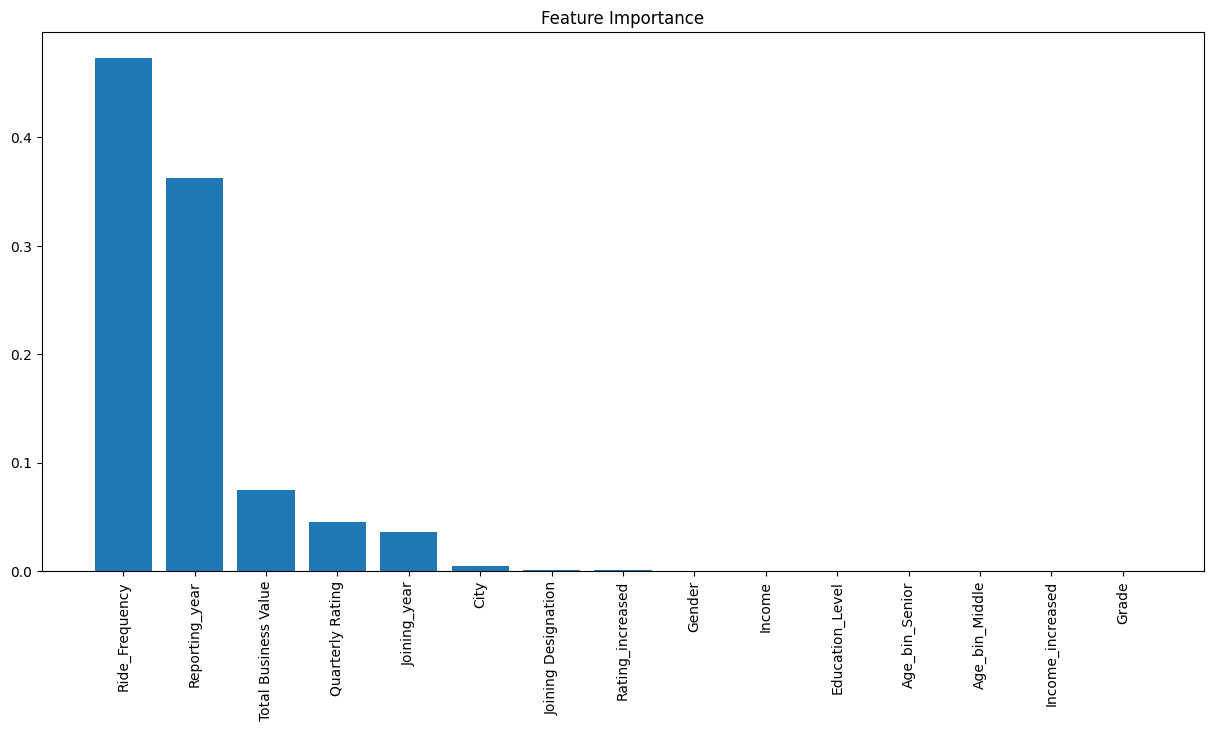

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]),importances[indices])
plt.xticks(range(X_train.shape[1]),names,rotation=90)
plt.show()

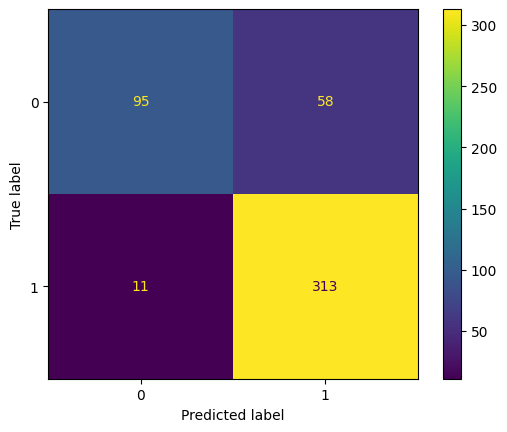

In [ ]:
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score,roc_auc_score,f1_score,classification_report
conf = confusion_matrix(y_test, gb.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=gb.classes_)
disp.plot()

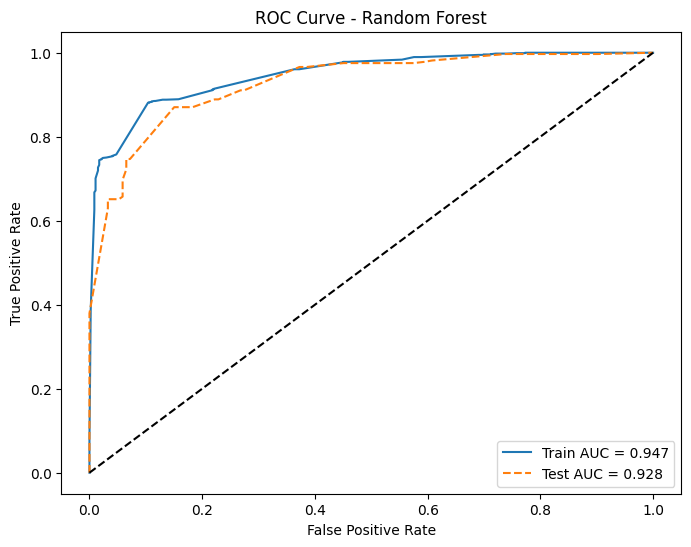

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities
y_train_prob = gb.predict_proba(X_train)[:,1]
y_test_prob  = gb.predict_proba(X_test)[:,1]

# ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test,  tpr_test,  _ = roc_curve(y_test,  y_test_prob)

# AUC Scores
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test  = roc_auc_score(y_test,  y_test_prob)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}")
plt.plot(fpr_test,  tpr_test,  label=f"Test AUC = {auc_test:.3f}", linestyle="--")

plt.plot([0,1], [0,1], 'k--')  # diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.62      0.73       153
           1       0.84      0.97      0.90       324

    accuracy                           0.86       477
   macro avg       0.87      0.79      0.82       477
weighted avg       0.86      0.86      0.85       477



**Accuracy scores are the same for both algorithms- Random Forest and Gradient Boosting, but, Random Forest model is overfitting, hence we will go with the results of Boosting**

### **Questionnaire**

**Questionnaire**:
1. What percentage of drivers have received a quarterly rating of 5? -0

2. Comment on the correlation between Age and Quarterly Rating.-As the Age increases the median and the spread of average quarterly rating increases, however, there are outliers at young and middle age groups. There are few young and middle aged drivers who are getting high ratings between 3.0 and 4.0

3. Name the city which showed the most improvement in Quarterly Rating over
the past year- C29

4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value.
(T/F)-F

5. If a driver's Quarterly Rating drops significantly, how does it impact their Total
Business Value in the subsequent period?-Business Value also drops, as both are positively correlated with a correlation factor of 0.71

6. From Ola's perspective, which metric should be the primary focus for driver
retention?
1. ROC AUC
2. Precision
3. Recall
4. F1 Score

Recall should be the primary focus for driver retention, because the costliest error is missing a driver who is actually at risk of churning (a false negative), and recall directly measures how many true churners are captured for intervention.

7. How does the gap in precision and recall affect Ola's relationship with its
drivers and customers?

More recall and less precision means there is less chance of Ola misclassifying the churned driver as the driver retained resulting in higher driver and customer satisfaction.It might lower the decision threshold to catch more actual churners, which reduces false negatives but increases false positives but this aligns with retention goals when missing churners is costlier than contacting a few non-churners.

Less recall and more precision means there is less chance of Ola misclassifying the driver retained as driver churned, but, more false-negatives that is Ola misclassifying the churned drivers as drivers retained,it will negatively impact Ola's relationship with the already dissatisfied drivers . This way Ola will not be able to reduce the churn rate significantly.

More recall and more precision is a win-win situation for Ola but uncommon because improving one typically harms the other; the balance should be chosen by costs and can be managed via threshold tuning or optimizing Fβ where β>1 to emphasize recall.

Ola should treat recall as the primary target for churn prevention and then set a minimum acceptable precision (or optimize PR-AUC at a fixed outreach capacity) to control program costs.


8. Besides the obvious features like "Number of Rides", which lesser-discussed
features might have a strong impact on a driver's Quarterly Rating?- Joining Month(seasonality),Business Value, City, Education Level

9. Will the driver's performance be affected by the City they operate in? (Yes/No)-Yes

10.Analyze any seasonality in the driver's ratings. Do certain times of the year
correspond to higher or lower ratings, and why might that be?

1. Festive / Holiday Seasons from November to December (e.g., Diwali, Christmas, New Year in India):

Surge in rides → drivers get overworked → ratings may dip due to delays or stress.

2. Year-End/Quarter-End Pressure in February and March:

Companies push for targets → drivers push more rides → quality may drop.

3. New Financial Year / Fresh Quarter from April to July:

Drivers motivated, platforms give incentives → ratings improve.


### **Insights and Recommendations**-

1. The topmost features affecting the Driver Churn, in order of their importances from high to low, are-

 'Ride_Frequency',
 'Reporting_year',
 'Total Business Value',
 'Quarterly Rating',
 'Joining_year',
 'City',
 'Joining Designation',
 'Rating_increased',
 'Gender',
 'Income',
 'Education_Level',
 'Age_bin_Senior',
 'Age_bin_Middle',
 'Income_increased',
 'Grade'

  Our model is having a recall score of 97% and 84% precision , higher recall score means the model has very minute chances to misclassify the churned drivers , hence predicting more number of churned drivers correctly which is good for Ola to reduce the churn rate.

 2. C20 is the City with most number of churned drivers, while C29 has shown significant improvement in Quarterly Ratings, hence Ola should study what went well in C29 city and implement the same strategies for C20. Also, some specific strategies should be implemented on the basis of city demographics,development,economic condition etc. as City is one of the top 5 predictors.

 3. More number of rides mean more business value, and higher business value means good rating, more driver satisfaction. Frequency of rides is the topmost factor, hence, Ola should bring some technological improvements to avoid delays and increase number of rides.

 4. Quarterly Rating is one of the topmost factor affecting the churn , and it is getting affected due to monthly seasonality . During festive season (November-January) there is surge in rides → drivers get overworked → ratings may dip due to delays or stress. Ola should either not penalize the drivers for low rating during this time or give them extra incentices to motivate for taking more rides during festive season. In Dec-January, winter season brings fog,traffic,delays hence some incentives needed at this time as well.

 5. Even though a few get income increases, entry-level employees still churn heavily.They’re often switching companies for higher salary hikes or moving up internally to Designation 2 or driving part time along with job/studies just for financial needs.Income increase alone doesn’t anchor them — career growth matters more.

6. Very few income increases at mid-level designation 2, which hurts retention.

7. Nobody gets income growth at designation 3. Employees don’t survive long (low tenure) but churn rate looks lower only because many have joined in 2020 or might be promoting to 4th designation.As the headcount is low at 4th designation, this is a high-risk attrition point. Ola needs to retain drivers at this designation through deeper analysis, as to what city they are majorly coming from, giving extra incentives and income increase, taking feedbacks from them and implementing the strategies as per the feedback received.


8. Income increase isn’t a driver at higher designation 4 and 5, other retention levers (prestige, recognition, stability, other facilities like insurance etc.) matter more. Designation 5 (Senior-most) stay longer but eventually exit in large proportion may be due to better offers elsewhere, limited growth, or burnout.Ola hasn't hired anyone on designation 5 in 2020.

9. Drivers whose income have increased has just 6% churn rate, while others whose income have been stagnant have churn rate of 69% hence increase in income is a major factor affecting churn rate.

10. Drivers staying more than 2 years and also having income growth are less likely to churn.

11. Most of the drivers belong to the middle age group (32) but they have higher churn rate as compared to that of senior age group which are staying longer.

12. Overall, only 2% of the drivers have got raise, and 46.3% drivers have got increase in ratings. The overall churn rate is 67.87%

13. 58.9% drivers are male but the churn rate is a little higher in female drivers(1%).

Male - ~67%
Female- ~68%

### **Feedback Loop**

Our model is having a recall score of 97% and 84% precision , higher recall score means the model has very minute chances to misclassify the churned drivers , hence predicting more number of churned drivers correctly which is good for Ola to reduce the churn rate.

There should be a
periodic review process to
assess the model's relevance
and performance.

Data should be collected through surveys or
feedback mechanisms on new trends,
driver concerns, and
customer feedback and should be used to update the model with the latest data for the best results.